<a href="https://colab.research.google.com/github/thakurnimesh107/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Credit Card Default Prediction**



##### **Project Type**    -Classification
##### **Contribution**    - Team
##### **Team Member 1 - KAUSHAL KUMAR JHA**
##### **Team Member 2 - SHAMBHU NATH JHA**
##### **Team Member 3 - NIMESH THAKUR**
##### **Team Member 4 - ASIF PA**

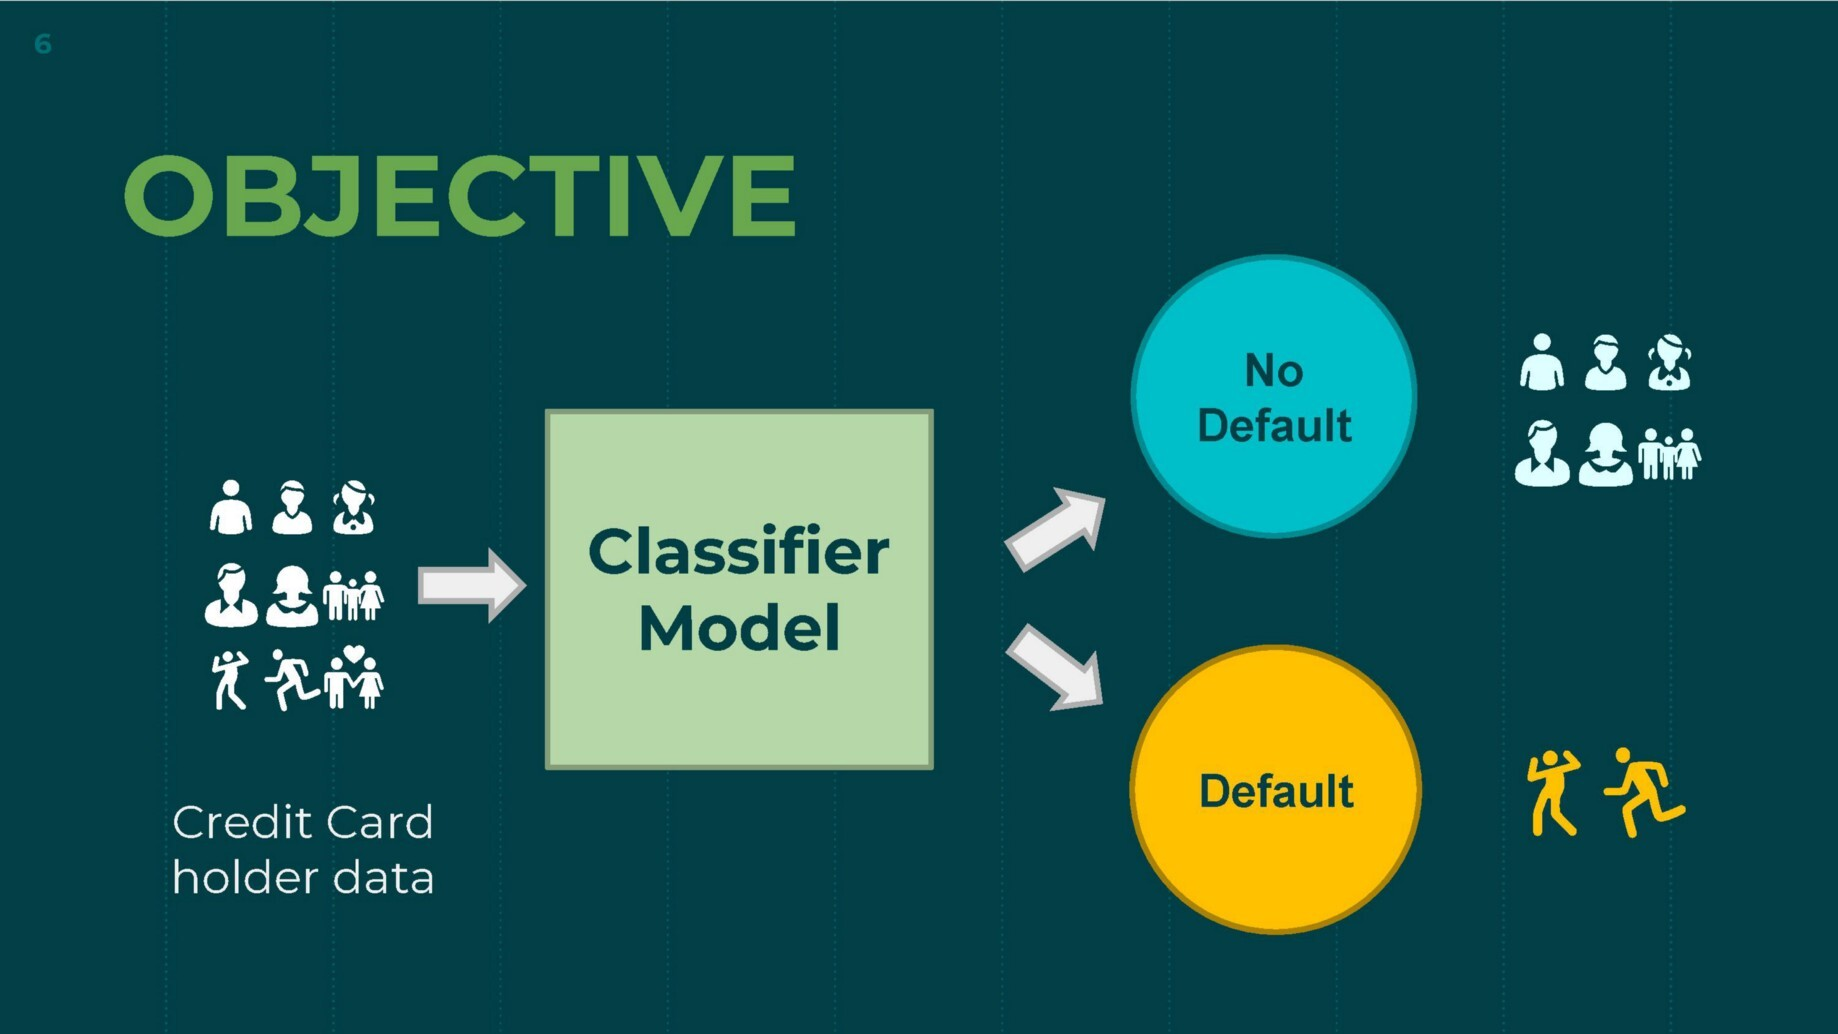

# **Project Summary -**

In recent years, the credit card issuers in Taiwan faced the cash and credit card debt crisis and the delinquency is expected to peak in the third quarter of 2006 (Chou,2006). In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders.

This Project Aims to create a predictive model that will help banks to predict whether the user default next month. Which will further help them to take prevention measures.

Steps involved:

Importing Libraries

Loading the dataset

Data Cleaning

EDA on features

Hypothesis Testing

Feature Engineering & Data Pre-processing

Fitting the classification models

HyperParameter Tuning

Evaluation Metrices of the model

Final selection of the model

Conclusion

# **GitHub Link -**

https://github.com/thakurnimesh107/Credit-Card-Default-Prediction

# **Problem Statement**


This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments

# **Data Description**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,confusion_matrix


### Dataset Loading

In [ ]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading DataSet
path='/content/drive/MyDrive/ML classification credit card default prediction/default of credit card clients.xls'
df=pd.read_excel(path,header=1)

### Dataset First View

In [ ]:
# Dataset First Look
df.head(5)


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [ ]:
df.tail(5)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[5 rows x 25 columns]

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(30000, 25)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

**We can see that no duplicate values is present in our dataset**

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

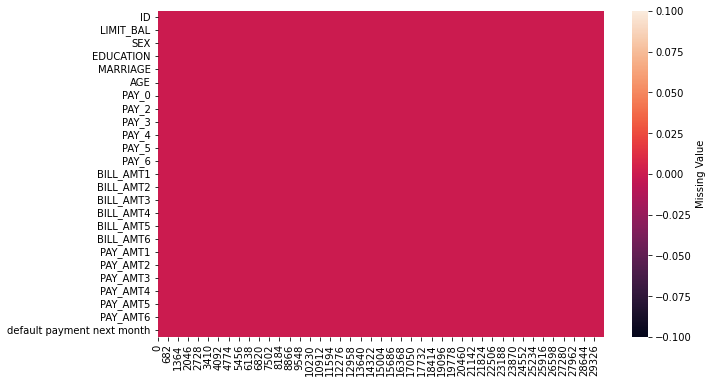

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cbar_kws={'label': 'Missing Value'})

### What did you know about your dataset?

In recent years, the credit card issuers in Taiwan faced the cash and credit card debt crisis and the delinquency is expected to peak in the third quarter of 2006 (Chou,2006). In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders



*   There are 30000 rows and 25 columns in our dataset.
*   No duplicate data is present in dataset.
*   No missing/Null values was there in our dataset.






## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe().transpose()

count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100       1.149988      -2.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default payment next month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                          -1.00       0.0       0.00        8.0  
PAY_2                          -1.00       0.0       0.00        8.0  
PAY_3                          -1.00       0.0       0.00        8.0  
PAY_4                          -1.00       0.0       0.00        8.0  
PAY_5                          -1.00       0.0       0.00        8.0  
PAY_6                          -1.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default payment next month      0.00       0.0       0.00        1.0

### Variables Description 

*   **ID**: ID of each client
*   **LIMIT_BA**L: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
*   **SEX**: Gender (1 = male, 2 = female)
*  **EDUCATION** : (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)
*   **MARRIAGE**: Marital status (0 = others, 1 = married, 2 = single, 3 = others)
*   **AGE**: Age in years

     **Pay_Scale for PAY_O To PAY_6**:
(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
*   PAY_0: Repayment status in September, 2005
*   PAY_2: Repayment status in August, 2005 (scale same as above)
*   PAY_3: Repayment status in July, 2005 (scale same as above)
*   PAY_4: Repayment status in June, 2005 (scale same as above)
*   PAY_5: Repayment status in May, 2005 (scale same as above)
*   PAY_6: Repayment status in April, 2005 (scale same as above)
*   BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
*   BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
*   BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
*   BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
*   BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
*   BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
*   PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
*   PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
*   PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
*   PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar
*   PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
*   PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
*   default.payment.next.month: Default payment (1=yes, 0=no)










































### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns:
  print(f'Unique value in {i} is----------{df[i].unique()}\n')


Unique value in ID is----------[    1     2     3 ... 29998 29999 30000]

Unique value in LIMIT_BAL is----------[  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]

Unique value in SEX is----------[2 1]

Unique value in EDUCATION is----------[2 1 3 5 4 6 0]

Unique value in MARRIAGE is----------[1 2 3 0]

Unique value in AGE is----------[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 

## 3. ***Data Wrangling***

### Data Wrangling Code

**Before performing data wrangling on dataset we are making one copy of dataset so that our original dataset remains same.We will proceed further with copied dataset.**

In [ ]:
#Creating Copy
df1=df.copy()

In [ ]:
#Checking shape of copied dataset
df1.shape

(30000, 25)

In [ ]:
#Dropping ID column because there is no use of ID further.
df1.drop('ID',axis=1,inplace=True)

In [ ]:
#Renaming All columns for better understanding and visualization
df1=df1.rename(columns={'PAY_0':'PAY_1'})
df1.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df1.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df1.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
#Checking Updated columns
df1.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'default payment next month'],
      dtype='object')

# **Data Wrangling on Categorical Columns**

In [ ]:
#Creating dataframe for Categorical features
cat_columns=['SEX','EDUCATION','MARRIAGE']
cat_df=df[cat_columns]

In [ ]:
cat_df.shape

(30000, 3)

In [ ]:
cat_df.head()

SEX  EDUCATION  MARRIAGE
0    2          2         1
1    2          2         2
2    2          2         2
3    2          2         1
4    1          2         1

# **Mapping Categorical Colums in Cat_df for better visualisation**

In [ ]:
#maping numerical value to categorical for better visualisation
cat_df['SEX']=cat_df['SEX'].map({1:'Male',2:'Female'})
cat_df['EDUCATION']=cat_df['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
cat_df['MARRIAGE']=cat_df['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [ ]:
#Checking values in SEX columns
df1['SEX'].value_counts()          #2=Female,1=Male

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
#Replacing 2 with 0 in sex column (1=Male,2=Female) for better visualisation.
df1['SEX']=df1['SEX'].replace({2:0})
df1['SEX'].value_counts()              #0=Female,1=Male

0    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
#Education
df1['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In EDUCATION columns, 1 = graduate school, 2 = university, 3 = high school,and 0,4,5,6 = others, so we will replace 4,5,6 with 0.

In [ ]:
#Updating EDUCATION column
df1['EDUCATION']=df1['EDUCATION'].replace({4:0,5:0,6:0})
df1['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

In [ ]:
#Marriage
df1['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

We will replace 0 with 3 because both means "Others" in this column.

In [ ]:
#Updatind MARRIAGE column
df1.MARRIAGE.replace({0:3},inplace=True)
df1['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

### What all manipulations have you done and insights you found?

Answer Here.

*   First of all i have created a copy of original dataset so that any wrangling performed on copied data will not affect the original one.If it is required to use original dataset in future we can use it easily. 
*  I have dropped ID column because there was no further use of this column,it is better to dropp unwanted column from dataset for better results.
*   I have renamed some columns for better understaing and also to get better insight when we will do visual analysis on our dataset.
*  I have performed Data Wrangling on Categorical columns i.e SEX,EDUCATION and MARRIAGE.And mapped numerical values into categorical so that it will help in data visualisation part for better understanding. 

*   In SEX column I replaced 2 with 0 so that it will be easier to understand.
*   In EDUCATION columns 0,4,5,6 all represent 'others' so i replaced 4,5,6 with 0 and merged all individual counts of 4,5,6,0 together. It is better to merge all individual values whos meanings are same, for better visualisation rather than dealing with them individually.
*   In MARRIAGE column also i have replaced 0 with 3 because meaning of both was same as i have done in EDUCATION column.








## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Univariate Analysis**

#### Chart - 1 **Visualization of Defaulter vs Non-Defaulter**

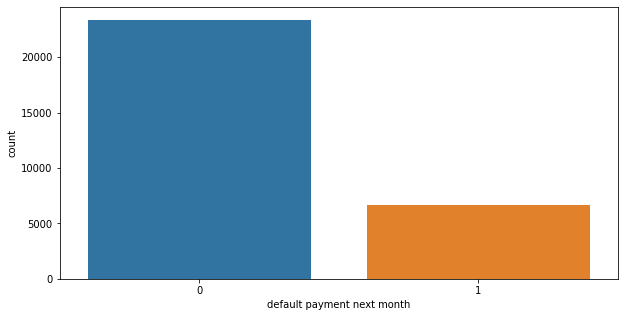

In [ ]:
#Visualization of Default(Target Variable) using Countplot
plt.figure(figsize=(10,5))
sns.countplot(x='default payment next month',data=df1)
plt.show()


##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

**0=Payment will not default,1=Payment will default**

We can see from the graph that number of defaulters is less than Non-Defaulters.And we have an imbalanced dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes Class imbalance can have ill impact on the accuracy of the classification model So it will be necessory for us to treat this problem before putting the data in training.

#### Chart - 2 ***Visualising Ratio of Gender(Male/Female)***

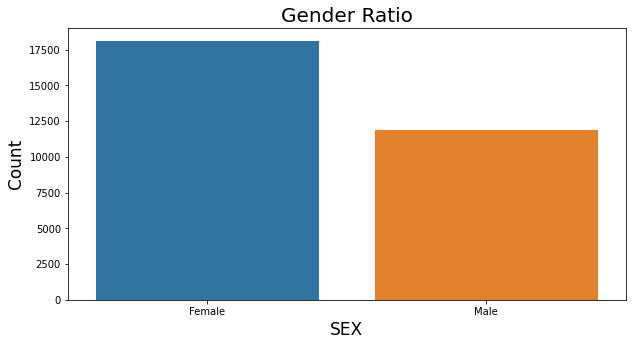

In [ ]:
#Using Count plot to check Gender ratio from SEX column in cat_df
plt.figure(figsize=(10,5))
sns.countplot(x='SEX',data=cat_df)
plt.title('Gender Ratio',size=20)
plt.xlabel('SEX',size=17)
plt.ylabel('Count',size=17)
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

We can see that Female credit card holder is more than Male.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, as we can see that Female credit card holder is more than Male so to increase male customers, Bank can give some offers to increase Male customers and at the same time they should take care of their Female customer to increase their business.

#### Chart - 3 ***Visualisation of Credit Card Holder on Their Educational Qualification***

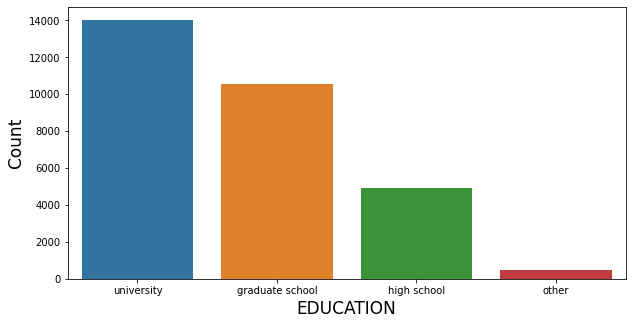

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x='EDUCATION',data=cat_df)
plt.xlabel('EDUCATION',size=17)
plt.ylabel('Count',size=17)
plt.show()


##### 1. Why did you pick the specific chart?

I have used count plot because it is used to show the count of observation of each category using bars.



##### 2. What is/are the insight(s) found from the chart?

Maximum credit card holders are from university followed by graduate school.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see most credit card holders are from University followed by Graduate school so Bank can target these category people to increase their bussiness and as we know source of income for high school candidates are very less so no need to make more focus on this group of people.

#### Chart - 4 ***Visualisation of Credit Card Holder on Their Marital  Status***

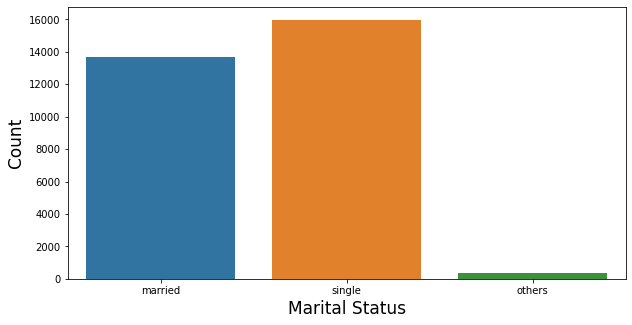

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x='MARRIAGE',data=cat_df)
plt.xlabel('Marital Status',size=17)
plt.ylabel('Count',size=17)
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

Maximum Credit Card holders are Single.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Single people make lots of expenditure than married people so they will use credit card more.Hence targetting Single people will surely increase the business.

#### Chart - 5 ***Visualisation of Credit Card Holder on Their age  irrespective of Gender.***

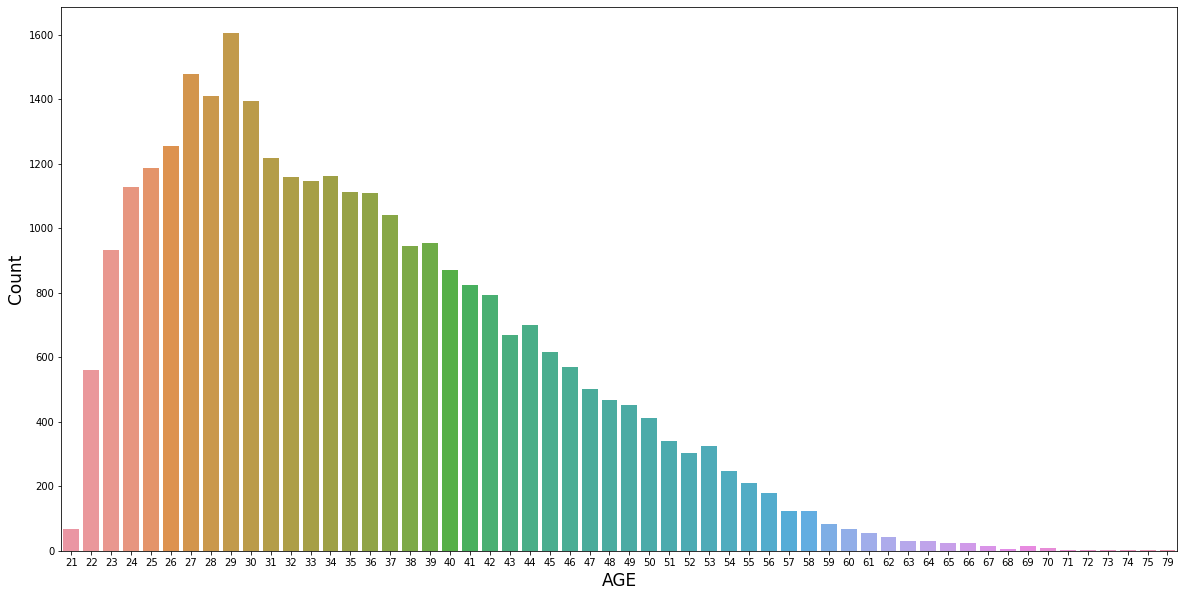

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(20,10))
sns.countplot(x='AGE',data=df1)
plt.xlabel('AGE',size=17)
plt.ylabel('Count',size=17)
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

*   We can see that most of the credit card holders age range between 26-30 years.
*   Credit card holders are very less after age of 60 years.




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Youngsters are using credit card more so we will mainly focus on them to increase our business.

# **Bivariate Analysis**

#### Chart - 6 ***Limit Balance Vs Defaulter***

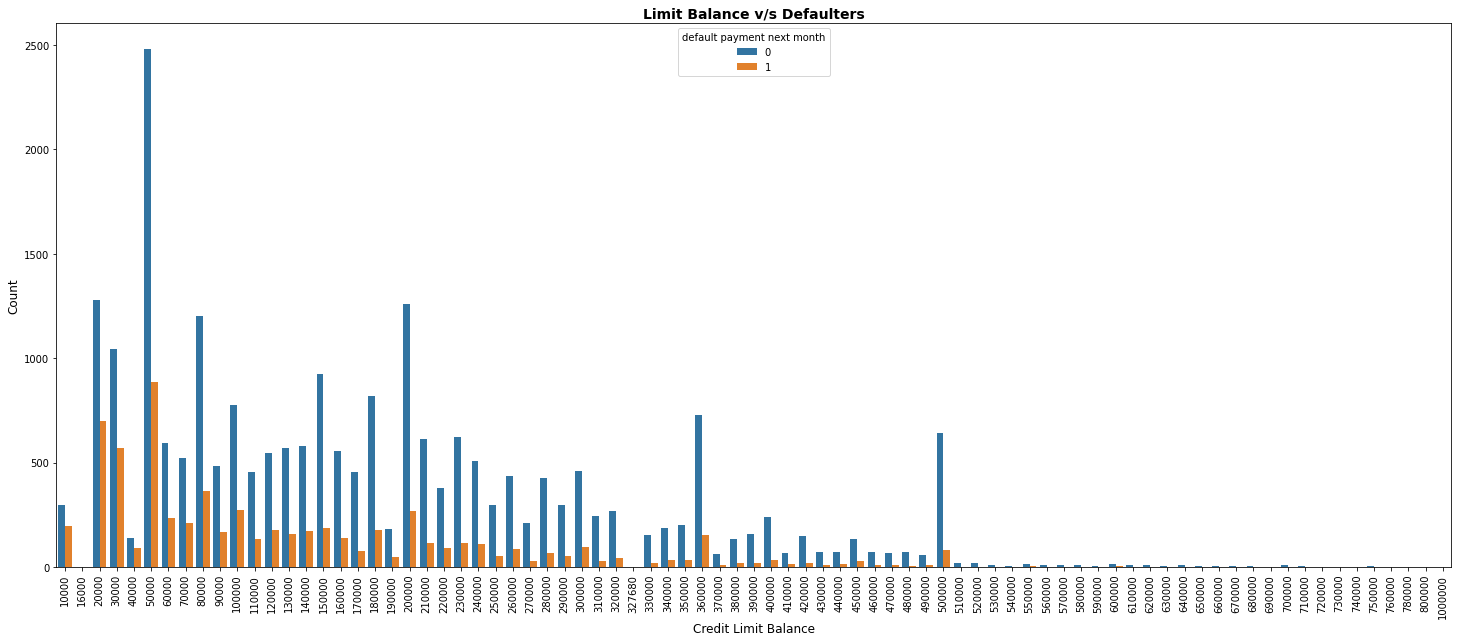

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize = (25,10))
sns.countplot(x = 'LIMIT_BAL',hue = 'default payment next month',data = df1)
plt.xticks(rotation = 90)
plt.title('Limit Balance v/s Defaulters', fontsize = 14, fontweight = 'bold')
plt.xlabel('Credit Limit Balance',fontsize = 12)
plt.ylabel('Count',fontsize=12)
plt.show()


##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

Maximum number of defaulters are when credit limit balance is 20,000,30,0000 and 50,000.Customers having credit limit balance 50,000 are more likely to default among all others.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Customers with credit limit 50,000 are more likely to default so Bank should charge them in case of default and may also reduce there limit to prevent any kind of loss to the company.

In [ ]:
#Adding Defulter column in cat_df for better understanding
cat_df['Defaulter']=df1['default payment next month']

#### Chart - 7  ***SEX Vs Defaulter***

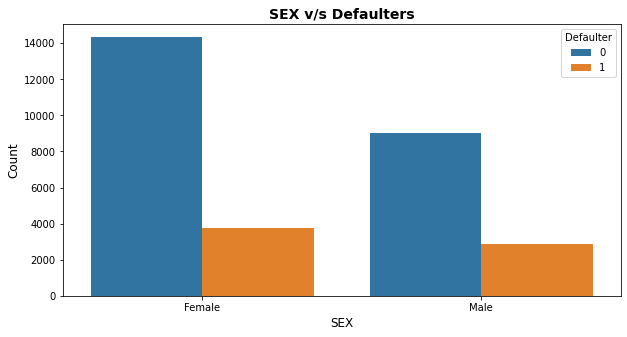

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize = (10,5))
sns.countplot(x = 'SEX',hue = 'Defaulter',data = cat_df)
plt.title('SEX v/s Defaulters', fontsize = 14, fontweight = 'bold')
plt.xlabel('SEX',fontsize = 12)
plt.ylabel('Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.





##### 2. What is/are the insight(s) found from the chart?

As we know maximum number of credit card holders are Female and from above graph it is also clear that maximum number of defaulters are Female.

In terms of default ratio(default/(default+not_default)),males having more default ratio than females.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Bank shall mainly focus on Female customers to increase the bussiness.However some policies should be provided to Male customers also to reduce the chance of being default.

#### Chart - 8  ***Education Vs Defaulter.***

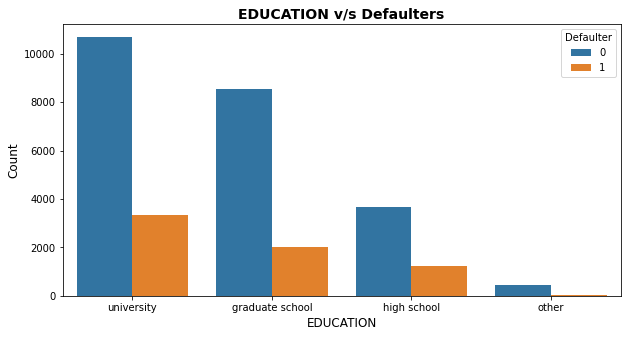

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize = (10,5))
sns.countplot(x = 'EDUCATION',hue = 'Defaulter',data = cat_df)
plt.title('EDUCATION v/s Defaulters', fontsize = 14, fontweight = 'bold')
plt.xlabel('EDUCATION',fontsize = 12)
plt.ylabel('Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

As maximum number of credit card holder is from unversity and from above graph it is clear that more number of defaulter is also from University only but again in terms of default ratio university people having less default ratio.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can target on University people more to increase our bussiness as most of the credit card holder is from this category.

#### Chart - 9  ***Marriage Vs Defaulter.***

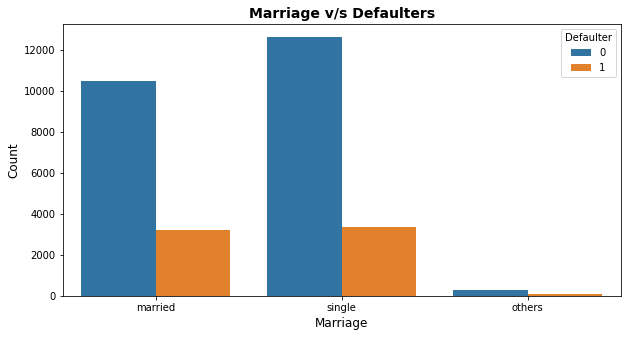

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize = (10,5))
sns.countplot(x = 'MARRIAGE',hue = 'Defaulter',data = cat_df)
plt.title('Marriage v/s Defaulters', fontsize = 14, fontweight = 'bold')
plt.xlabel('Marriage',fontsize = 12)
plt.ylabel('Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

From above we can see that married people having higher default ratio.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Married people having high default ratio than single and as we can see that most of the non-defaulter/maximum credit card holders belongs to Single category so we can mainly focus on them to increase the business.

#### Chart - 10 ***Age Vs Defaulter***

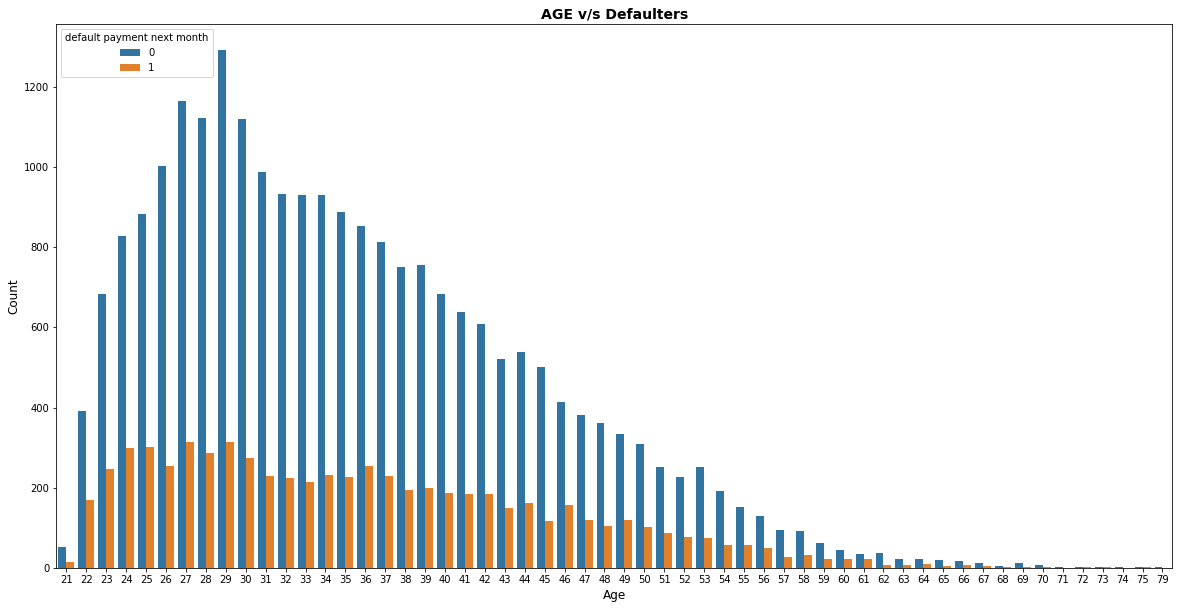

In [ ]:
# Chart - 10 visualization 
plt.figure(figsize = (20,10))
sns.countplot(x = 'AGE',hue = 'default payment next month',data = df1)
plt.title('AGE v/s Defaulters', fontsize = 14, fontweight = 'bold')
plt.xlabel('Age',fontsize = 12)
plt.ylabel('Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

From 21 t early 60s default ratio is varying non-linearly however after 60s default ratio is getting increased.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

For the age of 21s to early 60s there is almost constant proportion of age default for credit card payment yet one insightful information is that there is higher risk for people of age group more than 60s.

#### Chart - 11 ***Monthly wise repayment Vs Default***

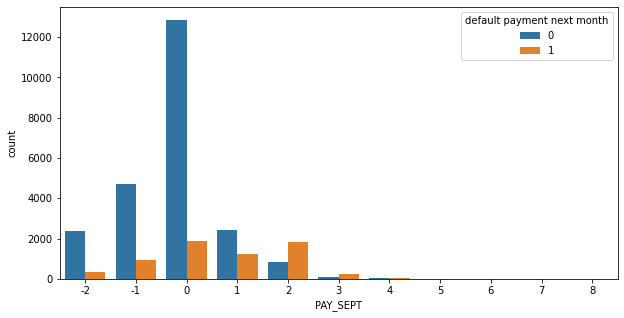

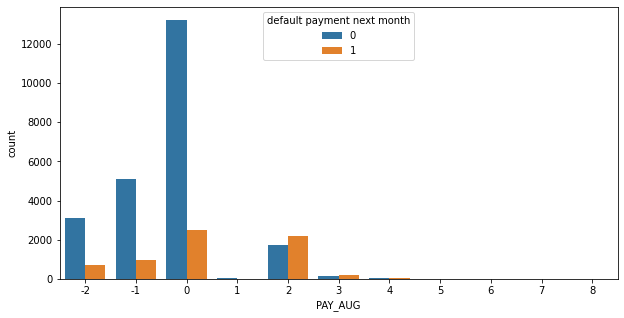

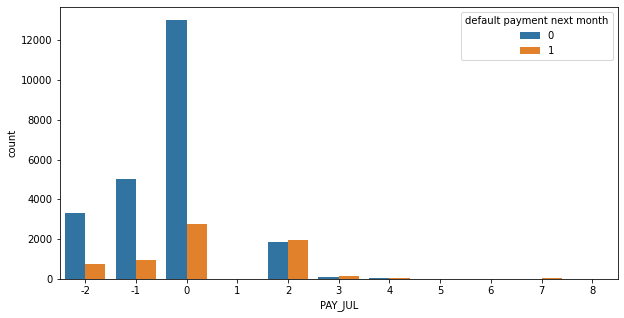

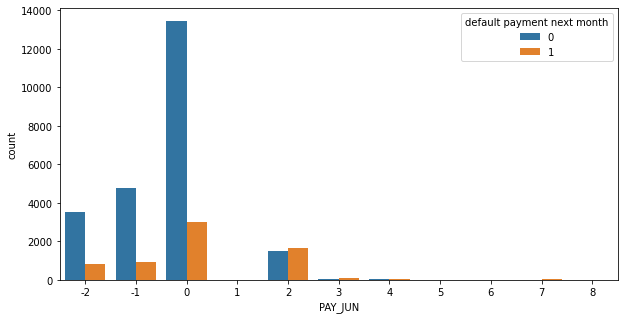

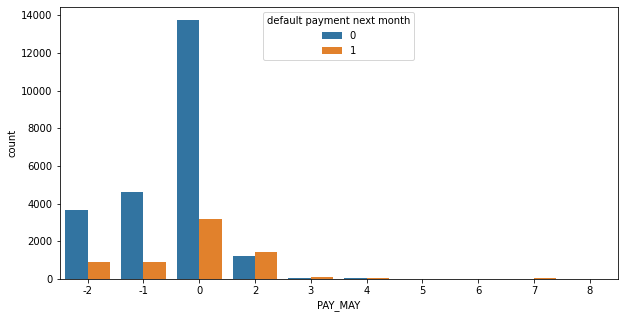

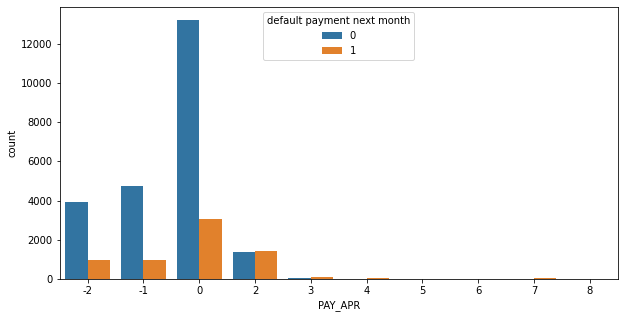

In [ ]:
# Chart - 11 visualization code
repay_col = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in repay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default payment next month', data = df1)

##### 1. Why did you pick the specific chart?

The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

It uses the concept of a bar chart for the visual depiction.

##### 2. What is/are the insight(s) found from the chart?

-2 = No consumption

-1 = paid in full

0 = use of revolving credit (paid minimum only)

1 = payment delay for one month

2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

We can see that, cutomers who are paying minimum amount only, having higher chance of being default.Also customers in this category are using credit card mostly.

#### Chart - 14 - Correlation Heatmap

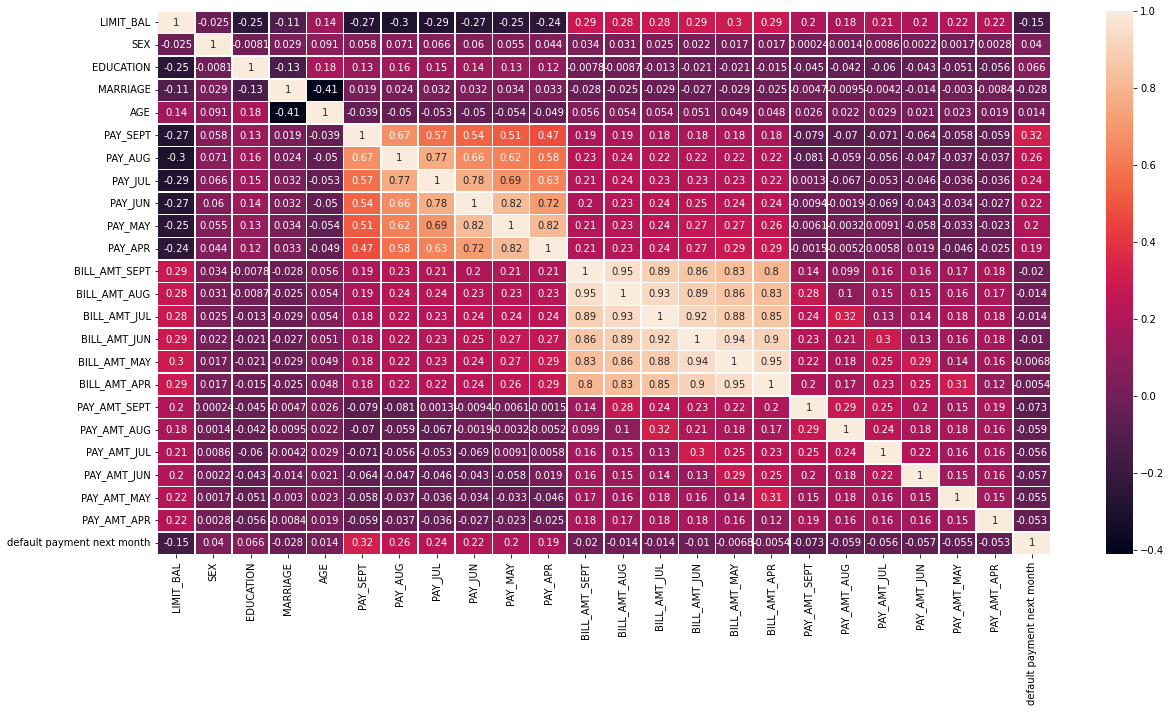

In [ ]:
# Correlation Heatmap visualization code
plt.figure (figsize= (20,10))
sns.heatmap(df1.corr(),linewidths=.5,annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. 

Correlation plots are used to understand which variables are related to each other and the strength of this relationship. 

A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. 

The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship. 

##### 2. What is/are the insight(s) found from the chart?

From heatmap it is clear that some of features(eg: PAY_MAY & PAY_APR, BILL_AMT_MAY & BILL_AMT_APR etc) are highly correlated to each other but we are not going to dropp anyone of them because they contains the transation details of customer.

#### Chart - 15 - Pair Plot 

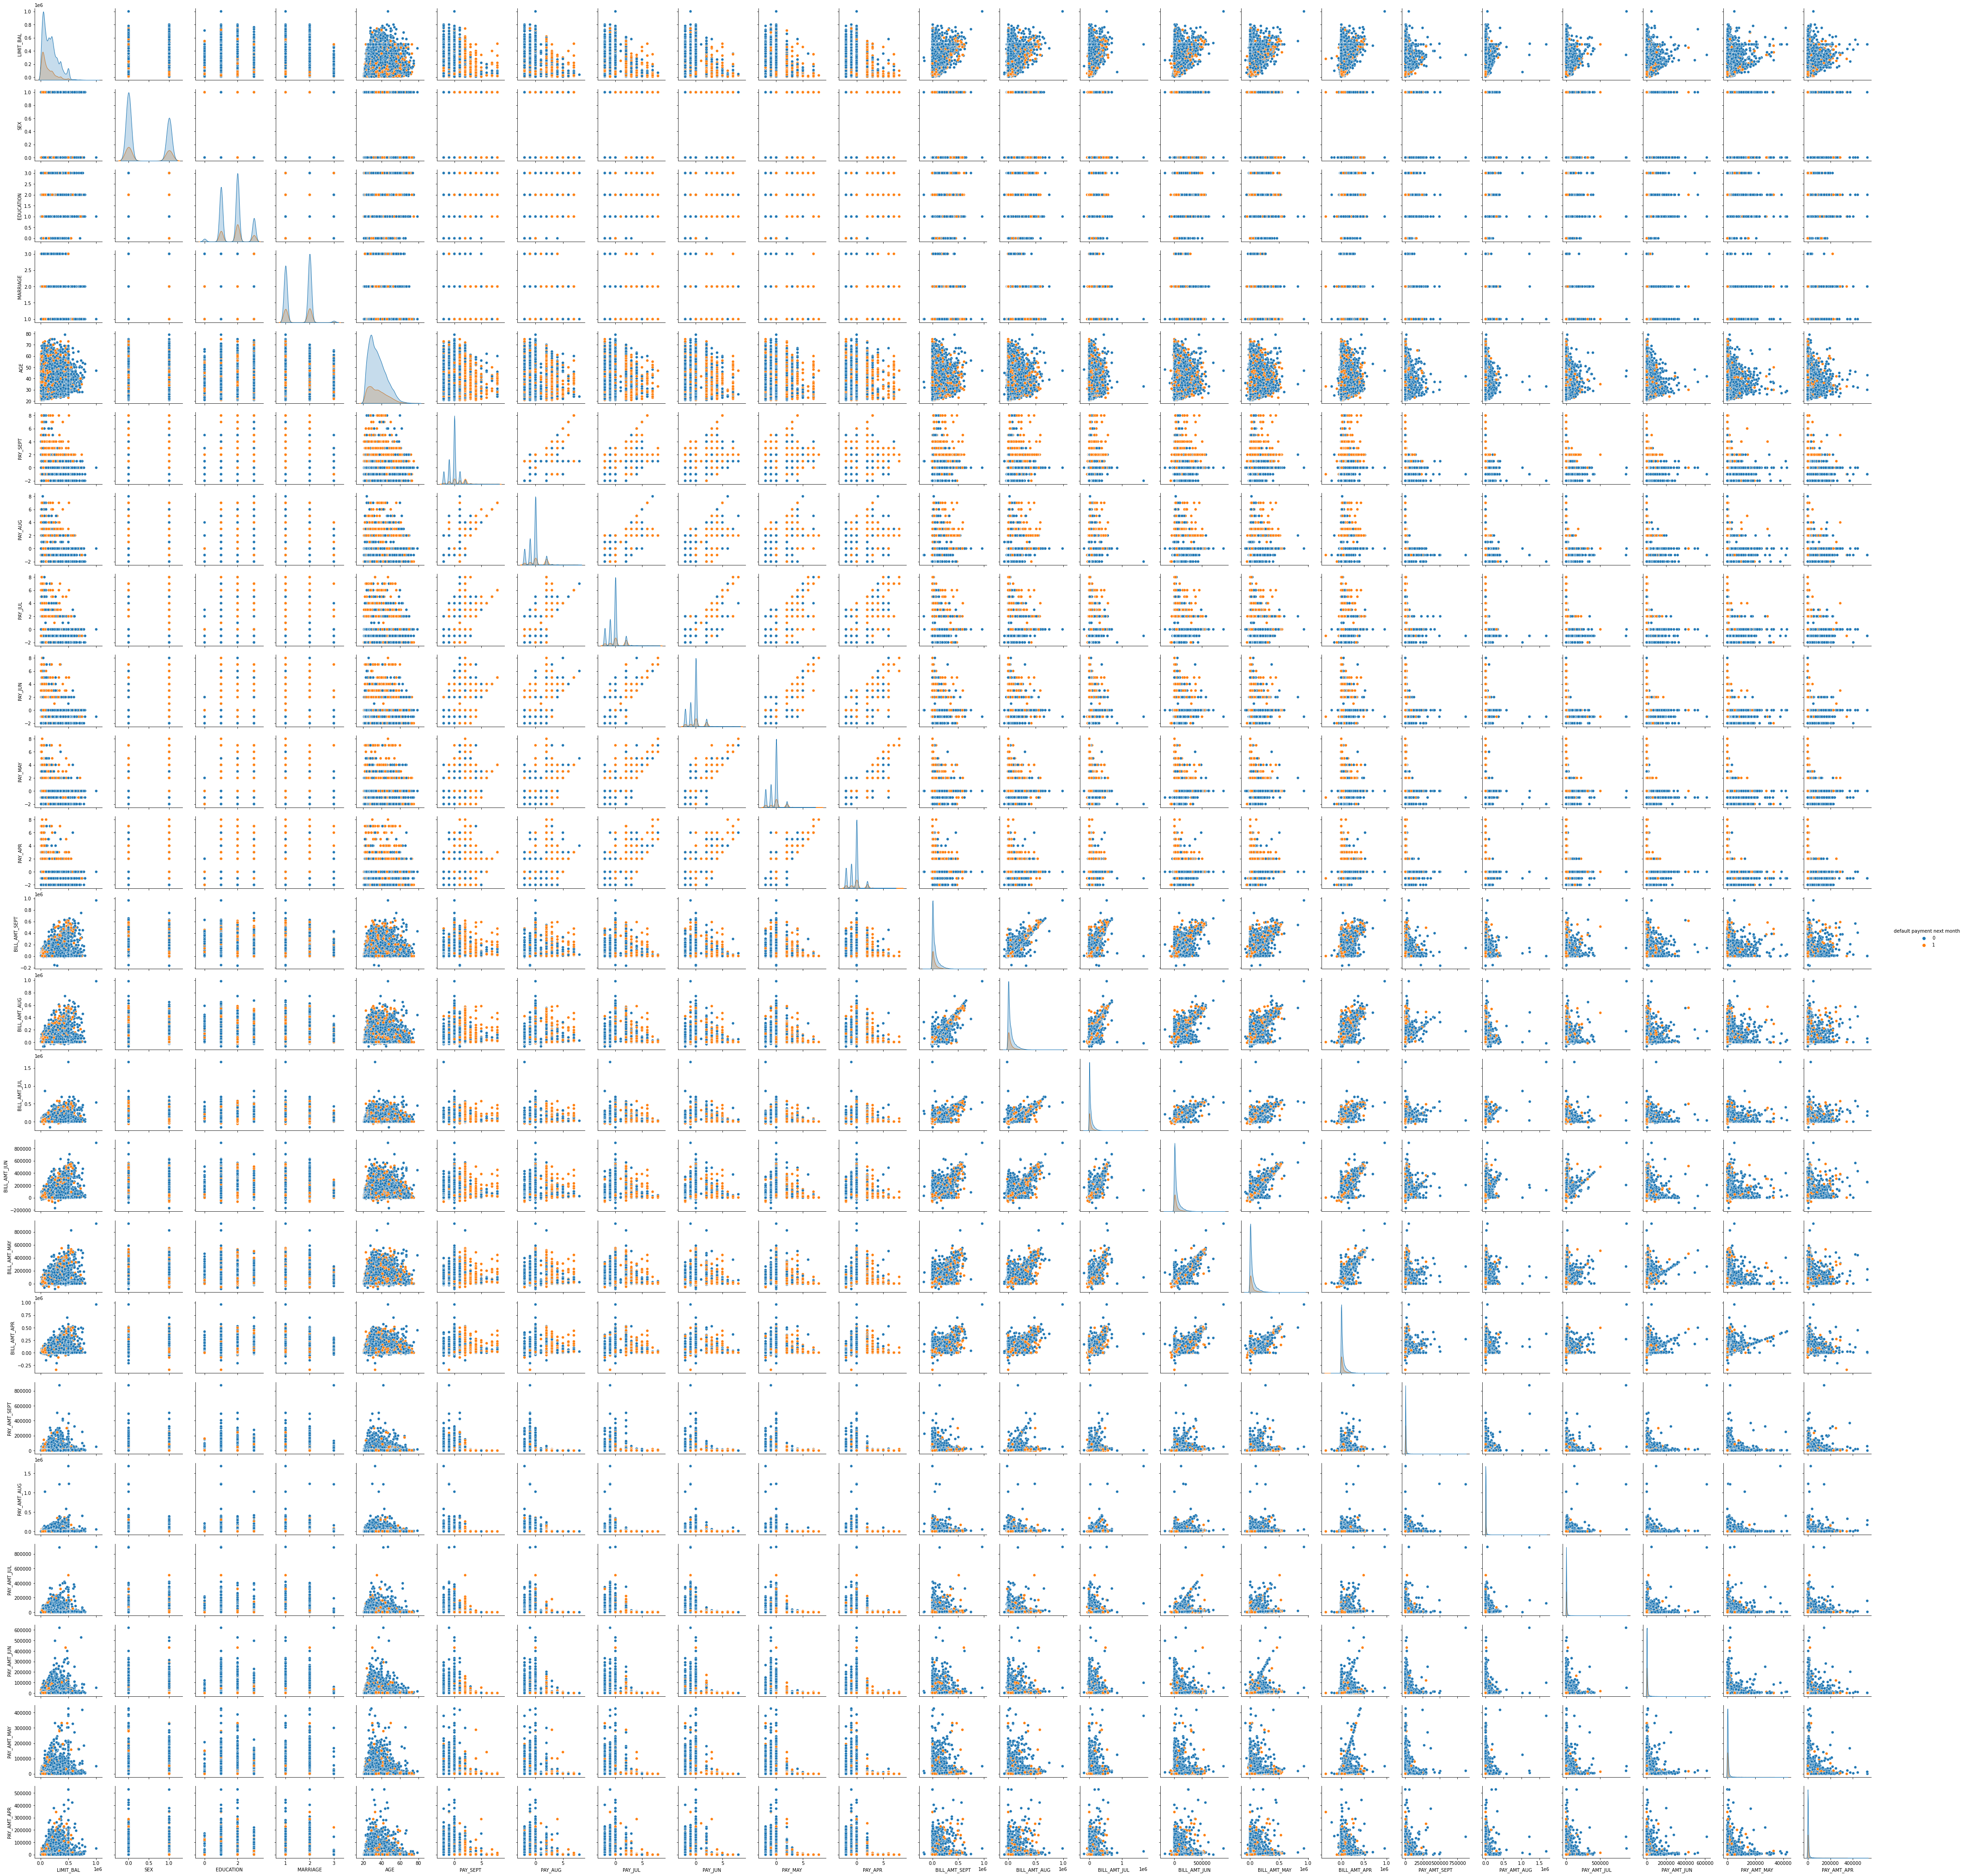

In [ ]:
# Pair Plot visualization code
sns.pairplot(df1, hue="default payment next month")

##### 1. Why did you pick the specific chart?

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure. This is essential when we are exploring our dataset and trying to become familiar with it.

##### 2. What is/are the insight(s) found from the chart?

We can see that some of features are highly correlated to each others.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis(HO):** Most of the credit card holders are single not married.

**Alternate Hypothesis(Ha):**Most of the credit card holders are married not single.


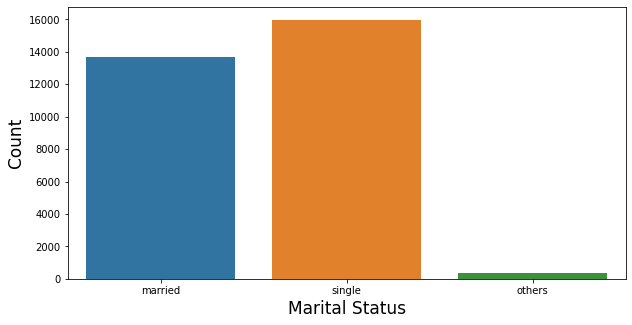

In [ ]:
#Visualisation of Hypothesis
plt.figure(figsize=(10,5))
sns.countplot(x='MARRIAGE',data=cat_df)
plt.xlabel('Marital Status',size=17)
plt.ylabel('Count',size=17)
plt.show()

**As we can see from the visualisation that most of the credit card holders are Single so we can accept our Null Hypothesis(HO).**

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis(HO):** All features of dataset having some amount of null values.

**Alternate Hypothesis(Ha):** There is no null value in any features of dataset.

---



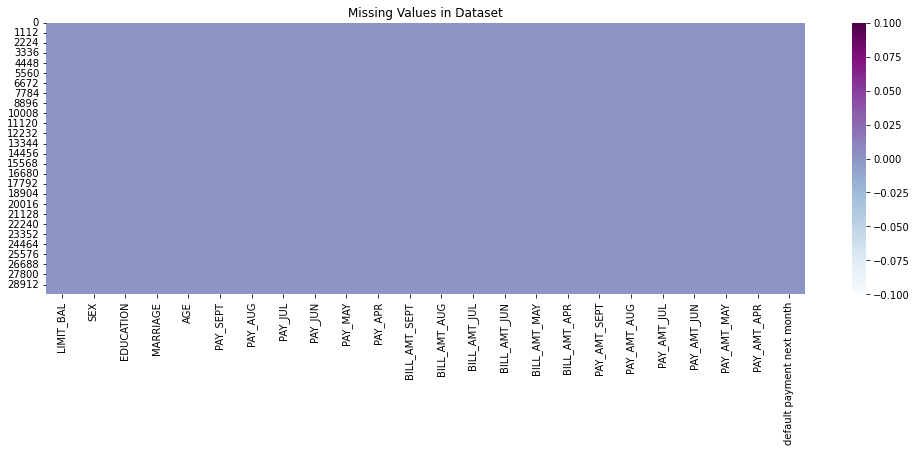

In [ ]:
#Visualisation of Hypothesis.
plt.figure(figsize=(17, 5))
sns.heatmap(df1.isnull(),cbar=True,cmap = 'BuPu')
plt.title('Missing Values in Dataset')
plt.show()


**As we can see that there is no null value in any feature of dataset so we can reject our Null Hypothesis(HO).**

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis(HO):**Defaulter does not depends on Educational qualification.

**Alternate Hypothesis(Ha):**Defaulter also get affected by Educational qualification.

**Set signifance level to 5%**.

####2.Perform an appropriate statistical test.

In [ ]:
#Creating Contigency table of EDUCATION AND DEFAULT PAYMENT NEXT MONTH
cont_table=pd.crosstab(df1['default payment next month'], df['EDUCATION'], margins=False)
#Using Chi-square test to validate Null/Alternate Hypothesis
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(cont_table)
p

1.2332626245415605e-32

**P value is very less so we can reject Null hypothesis(HO).**

Hence proved defaulter also depends on EDUCATION.

#### Which statistical test have you done to obtain P-Value?

I have done Chi2 test to obtain p values.

####Why did you choose the specific statistical test?

I have used Chi2 because my variable was categorical.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df1.isnull().sum()


LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_SEPT                      0
PAY_AUG                       0
PAY_JUL                       0
PAY_JUN                       0
PAY_MAY                       0
PAY_APR                       0
BILL_AMT_SEPT                 0
BILL_AMT_AUG                  0
BILL_AMT_JUL                  0
BILL_AMT_JUN                  0
BILL_AMT_MAY                  0
BILL_AMT_APR                  0
PAY_AMT_SEPT                  0
PAY_AMT_AUG                   0
PAY_AMT_JUL                   0
PAY_AMT_JUN                   0
PAY_AMT_MAY                   0
PAY_AMT_APR                   0
default payment next month    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

**No missing value is found in our dataset to handle .**

### 2. Handling Outliers

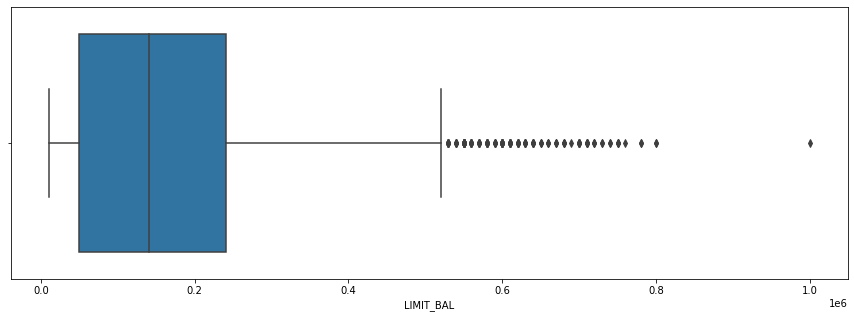

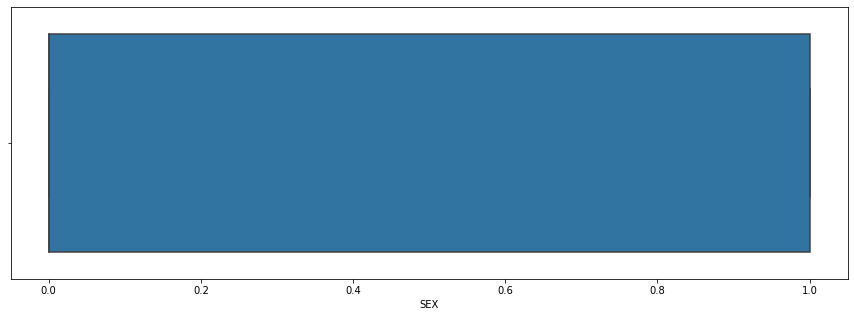

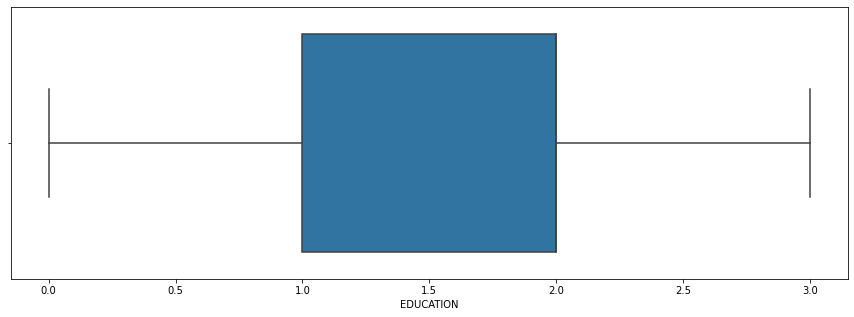

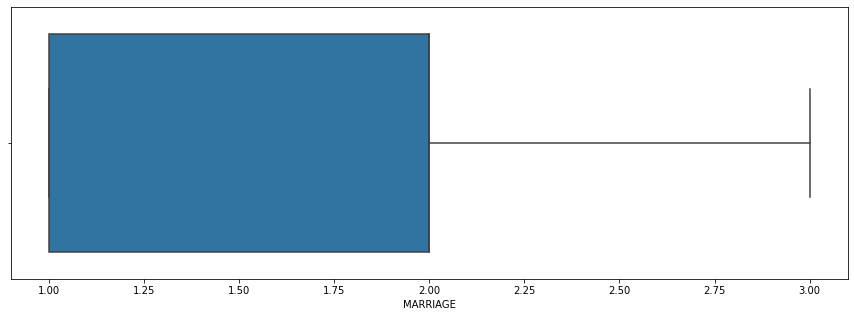

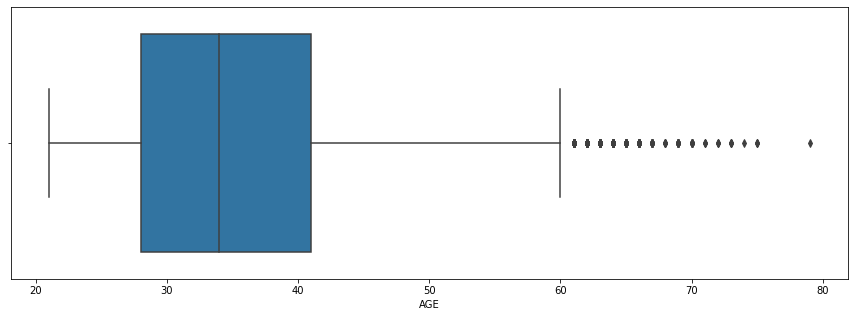

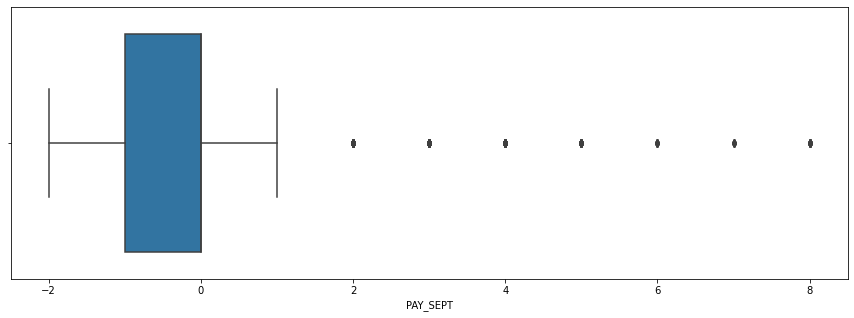

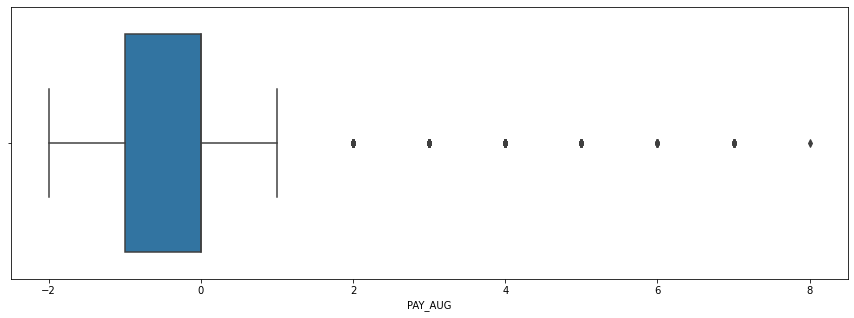

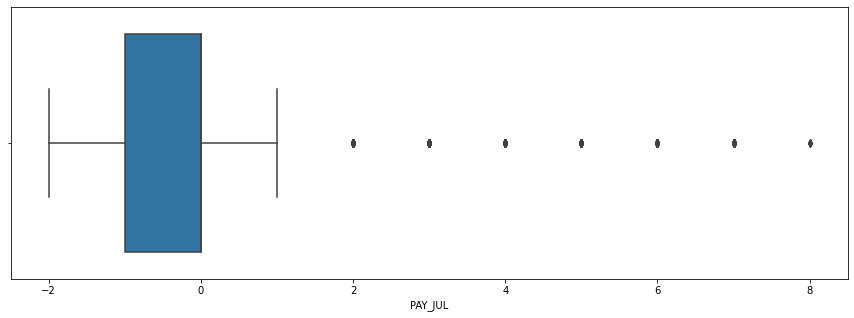

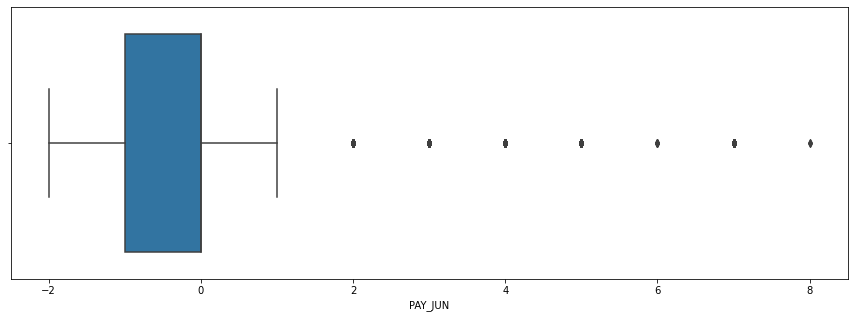

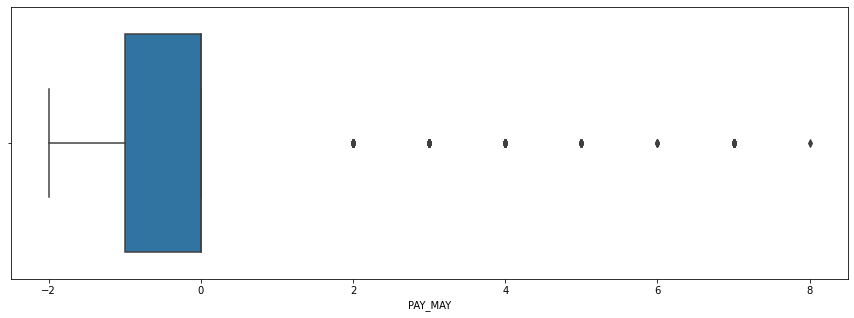

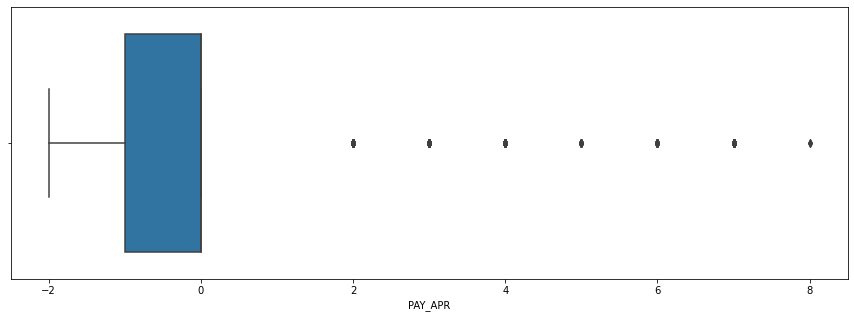

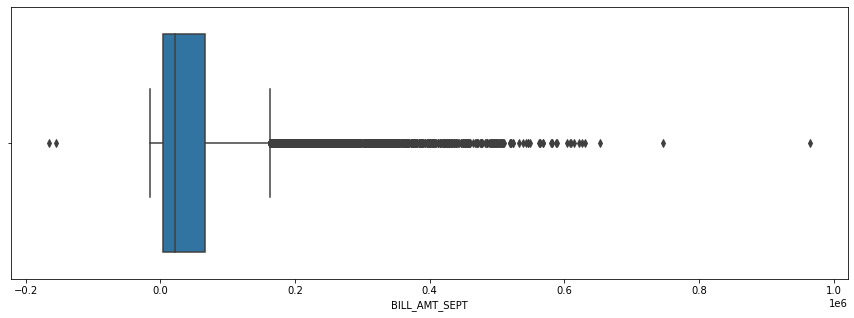

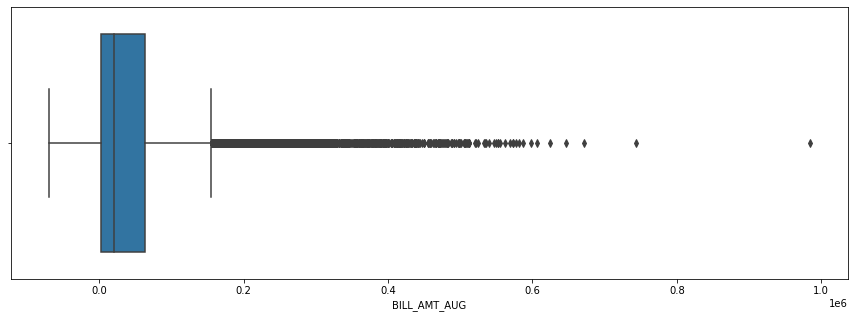

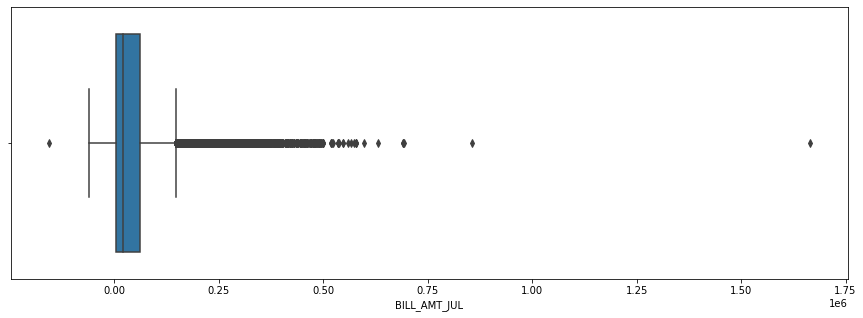

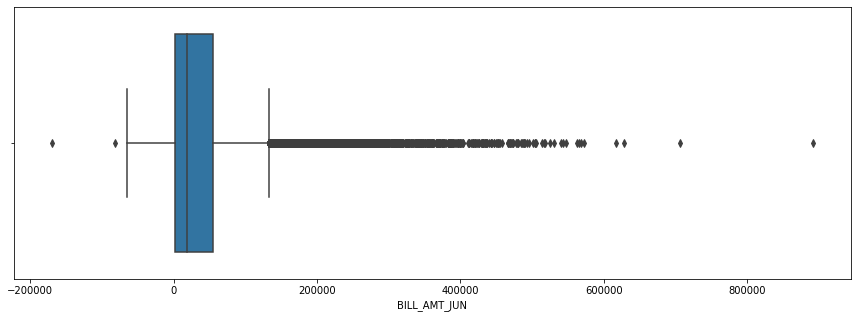

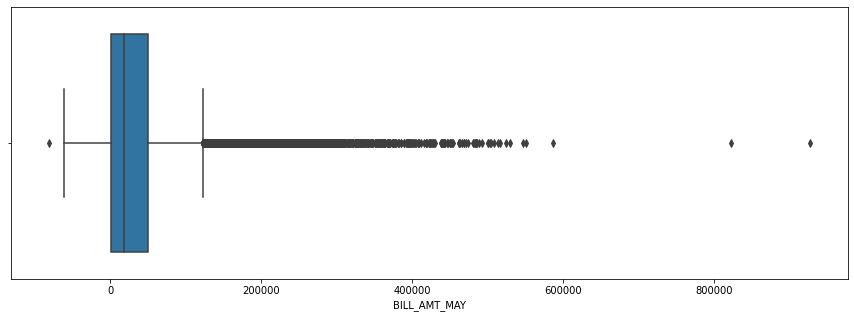

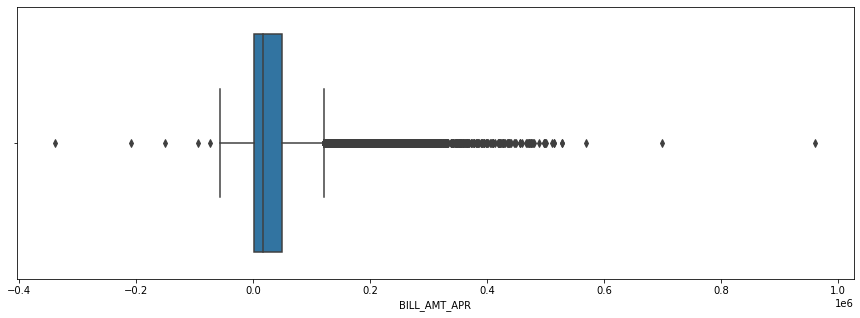

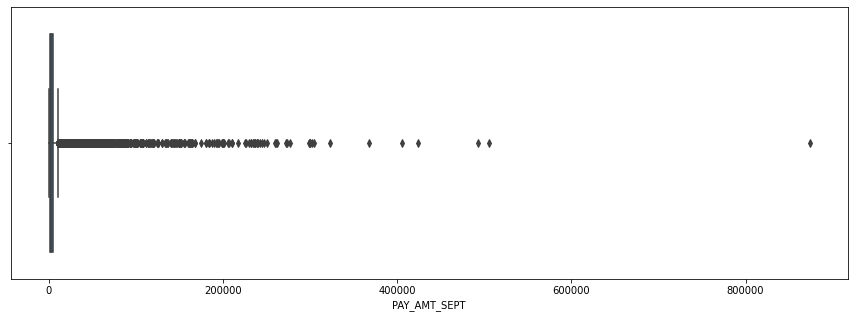

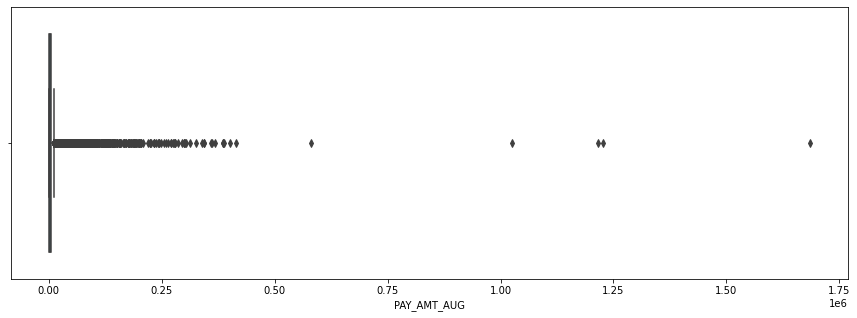

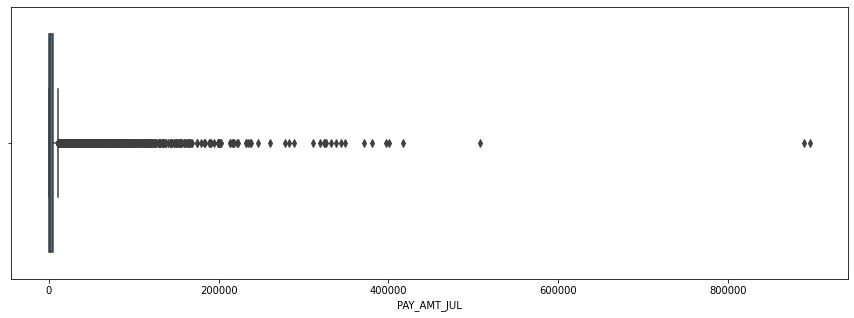

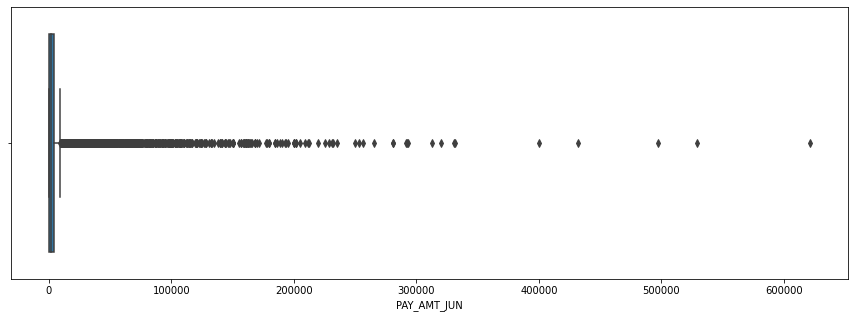

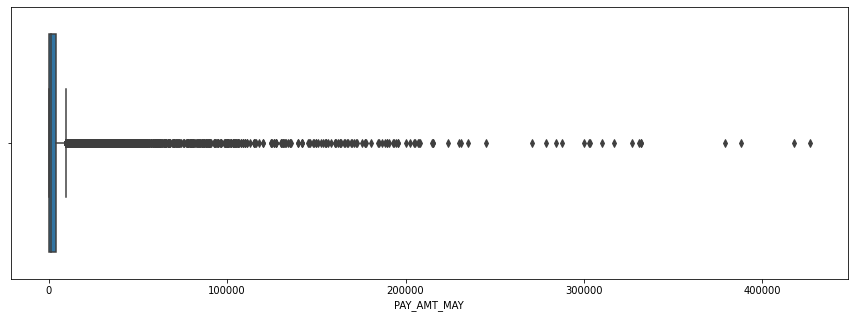

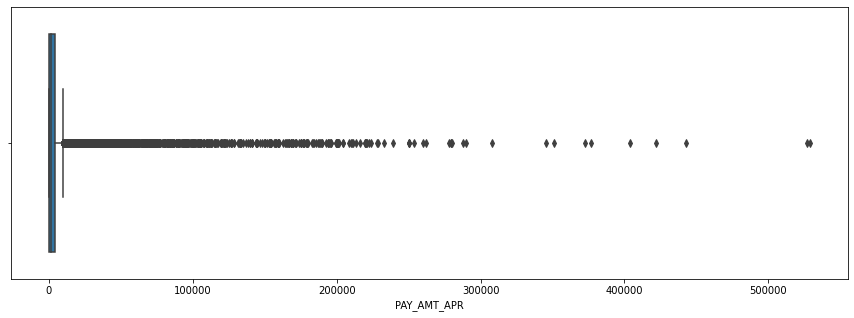

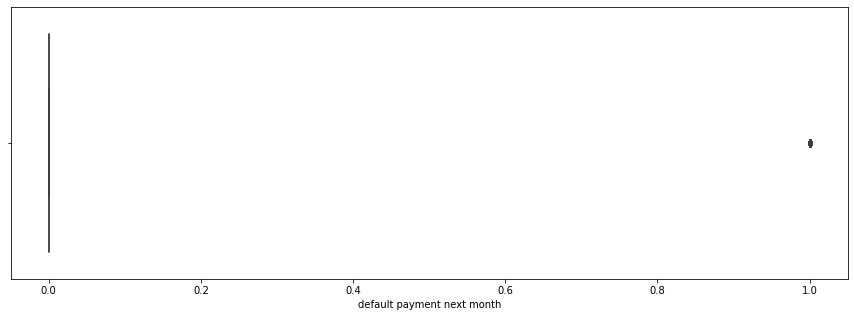

In [ ]:
# Handling Outliers & Outlier treatments
#Checking outliers in dataset using Boxplot
for col in df1.columns:
  plt.figure(figsize=(15,5))
  sns.boxplot(df1[col])


##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used boxplot to check outliers in dataset. Some points are lookes like outliers in numeric features which are mainly related to amount and we can use IQR method to treat these outliers but without actually knowing the actual limit of these columns from Bank and treating these outlying amount will result in loss of data.And There might be a chance that the amount which was maximum and lookes like outlier was actual value for that features so because of this i have not used any techniques to treat these outlying values. 

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
sum(df1.dtypes==object)


0

#### What all categorical encoding techniques have you used & why did you use those techniques?

**There wasn't any categorical values in dataset.**

# **One Hot Encoding**

In [ ]:
#Data for Independent variables
X=df1.drop(['default payment next month'],axis =1)

In [ ]:
X.shape

(30000, 23)

In [ ]:
X.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0      20000    0          2         1   24         2        2       -1   
1     120000    0          2         2   26        -1        2        0   
2      90000    0          2         2   34         0        0        0   
3      50000    0          2         1   37         0        0        0   
4      50000    1          2         1   57        -1        0       -1   

   PAY_JUN  PAY_MAY  ...  BILL_AMT_JUL  BILL_AMT_JUN  BILL_AMT_MAY  \
0       -1       -2  ...           689             0             0   
1        0        0  ...          2682          3272          3455   
2        0        0  ...         13559         14331         14948   
3        0        0  ...         49291         28314         28959   
4        0        0  ...         35835         20940         19146   

   BILL_AMT_APR  PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  \
0             0             0          689            0            0   
1          3261             0         1000         1000         1000   
2         15549          1518         1500         1000         1000   
3         29547          2000         2019         1200         1100   
4         19131          2000        36681        10000         9000   

   PAY_AMT_MAY  PAY_AMT_APR  
0            0            0  
1            0         2000  
2         1000         5000  
3         1069         1000  
4          689          679  

[5 rows x 23 columns]

In [ ]:
#maping numerical value to categorical for better Understabding
X['SEX']=X['SEX'].map({1:'Male',0:'Female'})
X['EDUCATION']=X['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
X['MARRIAGE']=X['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [ ]:
#Creating Dummies
X=pd.get_dummies(X)

In [ ]:
X.head()

LIMIT_BAL  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  PAY_JUN  PAY_MAY  PAY_APR  \
0      20000   24         2        2       -1       -1       -2       -2   
1     120000   26        -1        2        0        0        0        2   
2      90000   34         0        0        0        0        0        0   
3      50000   37         0        0        0        0        0        0   
4      50000   57        -1        0       -1        0        0        0   

   BILL_AMT_SEPT  BILL_AMT_AUG  ...  PAY_AMT_APR  SEX_Female  SEX_Male  \
0           3913          3102  ...            0           1         0   
1           2682          1725  ...         2000           1         0   
2          29239         14027  ...         5000           1         0   
3          46990         48233  ...         1000           1         0   
4           8617          5670  ...          679           0         1   

   EDUCATION_graduate school  EDUCATION_high school  EDUCATION_other  \
0                          0                      0                0   
1                          0                      0                0   
2                          0                      0                0   
3                          0                      0                0   
4                          0                      0                0   

   EDUCATION_university  MARRIAGE_married  MARRIAGE_others  MARRIAGE_single  
0                     1                 1                0                0  
1                     1                 0                0                1  
2                     1                 0                0                1  
3                     1                 1                0                0  
4                     1                 1                0                0  

[5 rows x 29 columns]

In [ ]:
X.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN',
       'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
       'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY',
       'PAY_AMT_APR', 'SEX_Female', 'SEX_Male', 'EDUCATION_graduate school',
       'EDUCATION_high school', 'EDUCATION_other', 'EDUCATION_university',
       'MARRIAGE_married', 'MARRIAGE_others', 'MARRIAGE_single'],
      dtype='object')

In [ ]:
#Data for Dependent Variable
Y=df1['default payment next month']
Y.shape

(30000,)

### 8. Handling Imbalanced Dataset

In [ ]:
#Count of each class in Target variable
df1['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

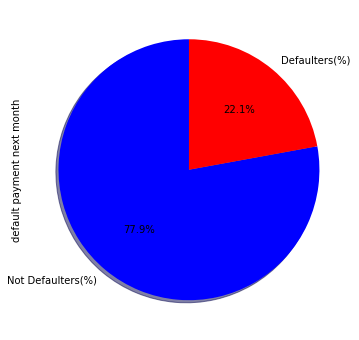

In [ ]:
#Visualisation of class imbalance
df1['default payment next month'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Defaulters(%)','Defaulters(%)'],
                               colors=['blue','red'],
                               explode=[0,0]
                              )
plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

As we can see that 77.9% of data belongs to Not defaulters category and only 22.1% belongs to defaulter category so it is clear that our dataset is imbalanced.

In a dataset with highly imbalanced classes, the classifier will always “predict” the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one.

The balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

####Handling Imbalanced data with SMOTE

In [ ]:
# importing SMOTE 
from imblearn.over_sampling import SMOTE

print('Dataset Before:\n', Y.value_counts())
smt = SMOTE()

# fit predictor and target variable
X_smt, Y_smt = smt.fit_resample(X,Y)

print('\nDataset After:\n',Y_smt.value_counts())

Dataset Before:
 0    23364
1     6636
Name: default payment next month, dtype: int64

Dataset After:
 1    23364
0    23364
Name: default payment next month, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? 

I have used SMOTE (Synthetic Minority Over-sampling technique) for balancing the dataset.

SMOTE is a technique in machine learning for dealing with issues that arise when working with an imbalanced data set. In practice, imbalanced data sets are common and most ML algorithms are highly prone to imbalanced data so we need to improve their performance by using techniques like SMOTE.

SMOTE algorithm works in 4 simple steps:

1)Choose a minority class as the input vector

 2)Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function) 
 
 3)Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor 
 
 4)Repeat the steps until data is balanced

### 9. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, Y_train, Y_test = train_test_split(X_smt,Y_smt,test_size = 0.25, random_state=1)
# Show the Training and Testing Data
#Checking the shape of
print(X_train.shape,Y_train.shape)
# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(35046, 29) (35046,)
(11682, 29) (11682,)


##### What data splitting ratio have you used and why? 

---



For the train-test split, I utilised an 75:25 ratio. We can see we have 35046 data for training and 11682 testing which is a fair split to start with as we have kept a good amount of data for training our model.

## ***7. ML Model Implementation***

### ML Model - 1 **Logistic Regression**





In [ ]:
# ML Model - 1 Implementation
logistic_regg=LogisticRegression(fit_intercept=True,max_iter=10000)

# Fit the Algorithm
logistic_regg.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

In [ ]:
#Cheking model coefficient
logistic_regg.coef_

array([[-2.59610362e-06,  1.47987093e-02,  1.36208744e-03,
         1.09309325e-03,  9.60657124e-04,  8.68379118e-04,
         7.60148507e-04,  6.66118705e-04, -8.59398821e-06,
         6.32724229e-06,  1.57787806e-06,  1.91207115e-09,
         2.92707832e-06,  3.19625200e-06, -3.23036510e-05,
        -2.09197758e-05, -8.28420521e-06, -9.59776850e-06,
        -8.40873372e-06, -5.10474102e-06, -2.37151970e-04,
        -1.13754518e-04, -2.33186327e-04, -1.15787922e-04,
        -2.95442065e-05, -1.28600659e-04, -1.17117457e-04,
        -1.56891506e-05, -2.73383096e-04]])

In [ ]:
# Checking the intercept value
logistic_regg.intercept_

array([0.00040932])

In [ ]:
# Predict on the model
# Geting the predicted probabilities
train_preds = logistic_regg.predict_proba(X_train)
test_preds = logistic_regg.predict_proba(X_test)

In [ ]:
train_preds

array([[0.58585713, 0.41414287],
       [0.50344794, 0.49655206],
       [0.50379314, 0.49620686],
       ...,
       [0.57310612, 0.42689388],
       [0.47255452, 0.52744548],
       [0.39212022, 0.60787978]])

In [ ]:
test_preds

array([[0.39755279, 0.60244721],
       [0.80007772, 0.19992228],
       [0.40306636, 0.59693364],
       ...,
       [0.63163808, 0.36836192],
       [0.65696001, 0.34303999],
       [0.40559507, 0.59440493]])

In [ ]:
 #predicting the values of y from x via model
y_pred_test = logistic_regg.predict(X_test)
y_pred_train = logistic_regg.predict(X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).

Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

# **Evaluation Matrics**

**Accuracy** : Accuracy = Number of correct predictions Total number of predictions.

**Precision** : Precision for a label is defined as the number of true positives divided by the number of predicted positives.Precision is a good metric to use when the costs of false positive(FP) is high.

**Precision=TP / (TP + FP)**

**Recall** : Recall for a label is defined as the number of true positives divided by the total number of actual positives.Recall is a good metric to use when the cost associated with false negative(FN) is high.

**Recall = TP / (TP + FN)**

**F1-Score** : This is defined as the harmonic mean of precision and recall.

**AUC-ROC** - The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.


I will be considering **Recall** mostly for evaluation of models because False Negative indicate that a person will not default when they actually default. And detecting defaulter customers as non defaulter will lead to huge loss to bank so we have to minimise **False Negative**  and as false negative decrease  Recall will increase.

In [ ]:
# Visualizing evaluation Metric Score chart
roc=roc_auc_score(Y_test, y_pred_test)
acc = accuracy_score(Y_test, y_pred_test)
prec = precision_score(Y_test, y_pred_test)
rec = recall_score(Y_test,y_pred_test)
f1 = f1_score(Y_test, y_pred_test)

eval_matric = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
eval_matric

Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Logistic Regression  0.623523   0.602242  0.733652  0.661484  0.623221

[[ 9034  8505]
 [ 4656 12851]]


[Text(0, 0.5, 'Defaulter'), Text(0, 1.5, 'Non-Defaulter')]

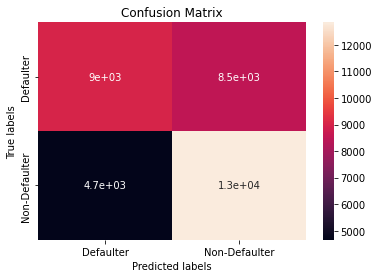

In [ ]:
#Confusion matrics for Train
labels = ['Defaulter', 'Non-Defaulter']
cm = confusion_matrix(Y_train, y_pred_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[2987 2838]
 [1560 4297]]


[Text(0, 0.5, 'Defaulter'), Text(0, 1.5, 'Non-Defaulter')]

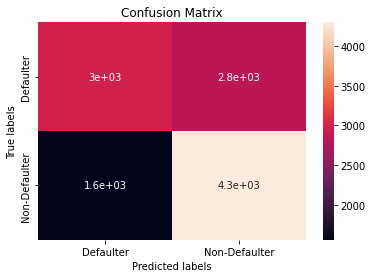

In [ ]:
#Confusion matrics for Test
labels = ['Defaulter', 'Non-Defaulter']
cm = confusion_matrix(Y_test, y_pred_test)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**We can see accuracy of our Logistic Regression model is approx 62%,precision 60% but Recall is quite higher which is aprrox 73%.**

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
logistic_regg = LogisticRegression()
#Setting the parameters for Cross Validation
param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5] } 

logistic_regg_cv = GridSearchCV(logistic_regg, param_grid, scoring = 'recall',n_jobs = -1, verbose = 3, cv = 5)
# Fit the Algorithm
logistic_regg_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=3)

In [ ]:
#Best parameters
logistic_regg_cv.best_params_

{'C': 0.2, 'penalty': 'l2'}

In [ ]:
#Best Score
best_recall=logistic_regg_cv.best_score_
print('Recall after Cross Validation is:',best_recall)

Recall after Cross Validation is: 0.5199785457398074


In [ ]:
 #predicting the values of y from x after CV via model
y_pred_test_cv = logistic_regg_cv.predict(X_test)
y_pred_train_cv = logistic_regg_cv.predict(X_train)

In [ ]:
# Visualizing evaluation Metric Score chart
roc=roc_auc_score(Y_test, y_pred_test_cv)
acc = accuracy_score(Y_test,y_pred_test_cv)
prec = precision_score(Y_test, y_pred_test_cv)
rec = recall_score(Y_test,y_pred_test_cv)
f1 = f1_score(Y_test, y_pred_test_cv)

eval_matric_cv = pd.DataFrame([['Tuned Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
eval_matric=eval_matric.append(eval_matric_cv,ignore_index = True)
eval_matric

Model  Accuracy  Precision    Recall  F1 Score  \
0        Logistic Regression  0.623523   0.602242  0.733652  0.661484   
1  Tuned Logistic Regression  0.572505   0.626133  0.365716  0.461737   

        ROC  
0  0.623221  
1  0.573073

[[4546 1279]
 [3715 2142]]


[Text(0, 0.5, 'Defaulter'), Text(0, 1.5, 'Non-Defaulter')]

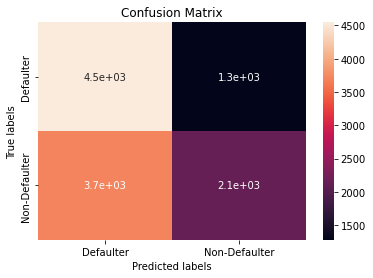

In [ ]:
#Confusion matrics for Test
labels = ['Defaulter', 'Non-Defaulter']
cm = confusion_matrix(Y_test, y_pred_test_cv)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch CV to find the best parameters for model to increase their accuracy.
GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model.The performance of a model significantly depends on the value of hyperparameters. 

GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Only Precision of Model increased(approx 62%) rest all decreased so we can say that our model is not giving best result after cross validation and we should consider that our base model was performing well.

### ML Model - 2 **Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)
rfc.fit(X_train,Y_train)
y_pred_rcf = rfc.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [ ]:
# Visualizing evaluation Metric Score chart
roc=roc_auc_score(Y_test, y_pred_rcf)
acc = accuracy_score(Y_test,y_pred_rcf)
prec = precision_score(Y_test, y_pred_rcf)
rec = recall_score(Y_test,y_pred_rcf)
f1 = f1_score(Y_test, y_pred_rcf)

eval_matric_rfc = pd.DataFrame([['Random Forest classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
eval_matric=eval_matric.append(eval_matric_rfc,ignore_index = True)
eval_matric


Model  Accuracy  Precision    Recall  F1 Score  \
0        Logistic Regression  0.623523   0.602242  0.733652  0.661484   
1  Tuned Logistic Regression  0.572505   0.626133  0.365716  0.461737   
2   Random Forest classifier  0.873224   0.898833  0.841899  0.869435   

        ROC  
0  0.623221  
1  0.573073  
2  0.873310

[[5270  555]
 [ 926 4931]]


[Text(0, 0.5, 'Defaulter'), Text(0, 1.5, 'Non-Defaulter')]

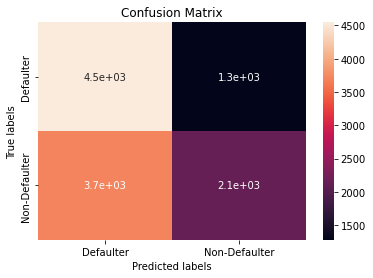

In [ ]:
#Confusion matrics for Test
labels = ['Defaulter', 'Non-Defaulter']
cm_rf= confusion_matrix(Y_test, y_pred_rcf)
print(cm_rf)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

We can see that accuracy of Random forest model is 87%,precision approx 90%, recall 84%, F1 score 86% and ROC 87%. We will compare the performance after cross validation.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid_rf = {'n_estimators': [150, 200, 250],
              'criterion': ['entropy', 'gini'],
              'max_depth':[3, 5, 7]}
rfc_cv=RandomizedSearchCV(estimator=rfc,param_distributions= param_grid_rf, scoring='recall',cv=5,verbose=5,n_jobs=-1)
# Fit the Algorithm
rfc_cv.fit(X_train,Y_train)
# Predict on the model
best_recall_rfc=rfc_cv.best_score_
print('Recall after Cross Validation is:',best_recall_rfc)
best_parameters_rfc = rfc_cv.best_params_
print('best parameters are',best_parameters_rfc)
y_pred_rfc = rfc_cv.predict(X_test)
roc=roc_auc_score(Y_test, y_pred_rfc)
acc = accuracy_score(Y_test, y_pred_rfc)
prec = precision_score(Y_test, y_pred_rfc)
rec = recall_score(Y_test, y_pred_rfc)
f1 = f1_score(Y_test, y_pred_rfc)
eval_matric_rfc_cv=  pd.DataFrame([[' Tuned Random Forest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
eval_matric= eval_matric.append(eval_matric_rfc_cv, ignore_index = True)
eval_matric

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Recall after Cross Validation is: 0.7710632240017579
best parameters are {'n_estimators': 250, 'max_depth': 7, 'criterion': 'entropy'}


Model  Accuracy  Precision    Recall  F1 Score  \
0        Logistic Regression  0.623523   0.602242  0.733652  0.661484   
1  Tuned Logistic Regression  0.572505   0.626133  0.365716  0.461737   
2   Random Forest classifier  0.873224   0.898833  0.841899  0.869435   
3        Tuned Random Forest  0.828882   0.871676  0.772409  0.819046   

        ROC  
0  0.623221  
1  0.573073  
2  0.873310  
3  0.829037

[[5159  666]
 [1333 4524]]


[Text(0, 0.5, 'Defaulter'), Text(0, 1.5, 'Non-Defaulter')]

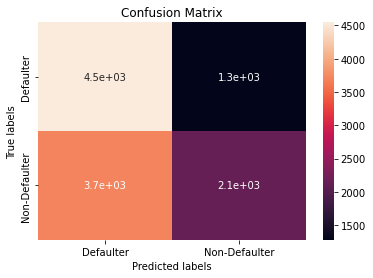

In [ ]:
#Confusion matrics for Test
labels = ['Defaulter', 'Non-Defaulter']
cm_rf_cv= confusion_matrix(Y_test, y_pred_rfc)
print(cm_rf_cv)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

##### Which hyperparameter optimization technique have you used and why?

Initially i have used Gridsearch Cv but it took too much time to excute thats why i have used Randomsearch CV.

Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Performance of model doesn't improved after cross validation so we can say that our base model was performing good with Recall of 84%.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Accuracy indicates overall correct predictions out of total predictions of the model. 

Precision is true prositive divided by number of predicated positive**(TP/(TP+FP)**. 

Recall stands of True positive divided by Actual positive**(TP/(TP+FN)**. 

F1-Score : This is defined as the harmonic mean of precision and recall.

ROC stands for how well model has predicted.

I will be considering **Recall** mostly for evaluation of models because False Negative indicate that a person will not default when they actually default. And detecting defaulter customers as non defaulter will lead to huge loss to bank so we have to minimise False Negative and as false negative decrease Recall will increase.



### ML Model - 3 **K - Nearest  Neighbors (KNN)**

In [ ]:
# ML Model - 3 Implementation
knn = KNeighborsClassifier(n_neighbors=7)
# Fit the Algorithm
knn.fit(X_train,Y_train)
# Predict on the model
y_pred_knn_test=knn.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

In [ ]:
# Visualizing evaluation Metric Score chart
roc=roc_auc_score(Y_test, y_pred_knn_test)
acc = accuracy_score(Y_test,y_pred_knn_test)
prec = precision_score(Y_test, y_pred_knn_test)
rec = recall_score(Y_test,y_pred_knn_test)
f1 = f1_score(Y_test,y_pred_knn_test)

eval_matric_knn = pd.DataFrame([['K-Nearest  Neighbors', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
eval_matric=eval_matric.append(eval_matric_knn,ignore_index = True)
eval_matric

Model  Accuracy  Precision    Recall  F1 Score  \
0        Logistic Regression  0.622325   0.601432  0.731432  0.660092   
1  Tuned Logistic Regression  0.577127   0.625720  0.389619  0.480219   
2   Random Forest classifier  0.872453   0.898959  0.840020  0.868491   
3        Tuned Random Forest  0.827940   0.869833  0.772409  0.818231   
4       K-Nearest  Neighbors  0.726246   0.681353  0.852826  0.757507   

        ROC  
0  0.622025  
1  0.577642  
2  0.872542  
3  0.828093  
4  0.725898

[[3474 2351]
 [ 943 4914]]


[Text(0, 0.5, 'Defaulter'), Text(0, 1.5, 'Non-Defaulter')]

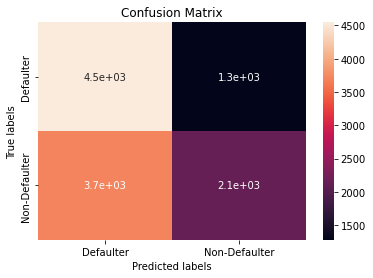

In [ ]:
#Confusion matrics for Test
labels = ['Defaulter', 'Non-Defaulter']
cm_knn= confusion_matrix(Y_test, y_pred_knn_test)
print(cm_knn)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

We can see that Recall for KNN model is approx 85% ,Accuracy is approx 72%, precision 68% ,F1 score 75% and ROC 72 %. Further we will check the performance after cross validation.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid_knn = {'n_neighbors':np.arange(1,30)}
# Fit the Algorithm
knn_cv=GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='recall', n_jobs = -1, verbose = 3, cv = 3)
knn_cv.fit(X_train,Y_train)

Fitting 3 folds for each of 29 candidates, totalling 87 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='recall', verbose=3)

In [ ]:
#Best Parameters
knn_cv.best_params_

{'n_neighbors': 1}

In [ ]:
#Best Recall After CV
knn_cv.best_score_

0.887130750266398

In [ ]:
#Prediction
y_pred_knn_cv=knn_cv.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
roc=roc_auc_score(Y_test, y_pred_knn_cv)
acc = accuracy_score(Y_test,y_pred_knn_cv)
prec = precision_score(Y_test, y_pred_knn_cv)
rec = recall_score(Y_test,y_pred_knn_cv)
f1 = f1_score(Y_test,y_pred_knn_cv)

eval_matric_knn_cv = pd.DataFrame([['Tuned K-Nearest  Neighbors', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
eval_matric=eval_matric.append(eval_matric_knn_cv,ignore_index = True)
eval_matric

Model  Accuracy  Precision    Recall  F1 Score  \
0         Logistic Regression  0.623523   0.602242  0.733652  0.661484   
1   Tuned Logistic Regression  0.572505   0.626133  0.365716  0.461737   
2    Random Forest classifier  0.873224   0.898833  0.841899  0.869435   
3         Tuned Random Forest  0.828882   0.871676  0.772409  0.819046   
4  Tuned K-Nearest  Neighbors  0.822719   0.767071  0.928291  0.840015   

        ROC  
0  0.623221  
1  0.573073  
2  0.873310  
3  0.829037  
4  0.822429

[[4174 1651]
 [ 420 5437]]


[Text(0, 0.5, 'Defaulter'), Text(0, 1.5, 'Non-Defaulter')]

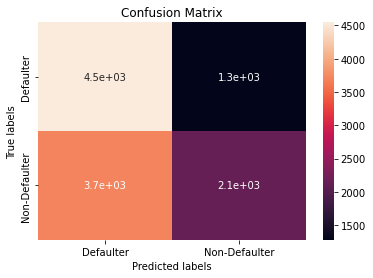

In [ ]:
#Confusion matrics for Test
labels = ['Defaulter', 'Non-Defaulter']
cm_knn_cv= confusion_matrix(Y_test, y_pred_knn_cv)
print(cm_knn_cv)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch CV to find the best parameters for model to increase their accuracy. GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model.The performance of a model significantly depends on the value of hyperparameters.

GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes performance of our model has been improved with improvmenet in all evaluation matrics.After cross validation accuracy becomes approx 82%,precision 76% recall 92% f1 score 83% and ROC 82%.

#### ML Model-4  **XGboost**

In [ ]:
#Implementing Model-4
xgboost_model=XGBClassifier()
#Fit the Algorithm
xgboost_model.fit(X_train,Y_train)
#Predict on the model
y_pred_xgb=xgboost_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
roc=roc_auc_score(Y_test, y_pred_xgb)
acc = accuracy_score(Y_test, y_pred_xgb)
prec = precision_score(Y_test,y_pred_xgb)
rec = recall_score(Y_test, y_pred_xgb)
f1 = f1_score(Y_test, y_pred_xgb)

eval_matric_xgb = pd.DataFrame([['XGboost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
eval_matric=eval_matric.append(eval_matric_xgb,ignore_index = True)
eval_matric

Model  Accuracy  Precision    Recall  F1 Score  \
0         Logistic Regression  0.623523   0.602242  0.733652  0.661484   
1   Tuned Logistic Regression  0.572505   0.626133  0.365716  0.461737   
2    Random Forest classifier  0.873224   0.898833  0.841899  0.869435   
3         Tuned Random Forest  0.828882   0.871676  0.772409  0.819046   
4  Tuned K-Nearest  Neighbors  0.822719   0.767071  0.928291  0.840015   
5                     XGboost  0.856360   0.915821  0.785726  0.845800   

        ROC  
0  0.623221  
1  0.573073  
2  0.873310  
3  0.829037  
4  0.822429  
5  0.856554

[[5402  423]
 [1255 4602]]


[Text(0, 0.5, 'Defaulter'), Text(0, 1.5, 'Non-Defaulter')]

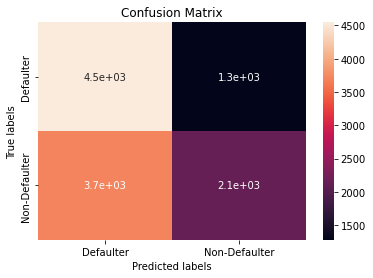

In [ ]:
#Confusion matrics for Test
labels = ['Defaulter', 'Non-Defaulter']
cm_xgb= confusion_matrix(Y_test, y_pred_xgb)
print(cm_xgb)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

The term “gradient boosting” comes from the idea of “boosting” or improving a single weak model by combining it with a number of other weak models in order to generate a collectively strong model. Gradient boosting is an extension of boosting where the process of additively generating weak models is formalized as a gradient descent algorithm over an objective function. Gradient boosting sets targeted outcomes for the next model in an effort to minimize errors. Targeted outcomes for each case are based on the gradient of the error (hence the name gradient boosting) with respect to the prediction.

We can see accuracy(85%),Precision(91%),F1 score(84%) and ROC(85%) is higher than KNN model but Recall(78%) is less than KNN model.
We will check its performance after cross validation.

 ### Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params_grid_xgb={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
xgb_cv=RandomizedSearchCV(estimator=xgboost_model,param_distributions=params_grid_xgb,cv=5,scoring='recall',verbose=5,n_jobs=-1)
#Fit the Algorithm
xgb_cv.fit(X_train,Y_train)
#Predict the model
y_pred_xgb_cv=xgb_cv.predict(X_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
#Best Parameters
xgb_cv.best_params_

{'n_estimators': 150, 'max_depth': 9}

In [ ]:
#Best Score
xgb_cv.best_score_

0.8127602116128688

In [ ]:
# Visualizing evaluation Metric Score chart
roc=roc_auc_score(Y_test, y_pred_xgb_cv)
acc = accuracy_score(Y_test, y_pred_xgb_cv)
prec = precision_score(Y_test,y_pred_xgb_cv)
rec = recall_score(Y_test, y_pred_xgb_cv)
f1 = f1_score(Y_test, y_pred_xgb_cv)

eval_matric_xgb_cv = pd.DataFrame([['Tuned XGboost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
eval_matric=eval_matric.append(eval_matric_xgb_cv,ignore_index = True)
eval_matric

Model  Accuracy  Precision    Recall  F1 Score  \
0         Logistic Regression  0.623523   0.602242  0.733652  0.661484   
1   Tuned Logistic Regression  0.572505   0.626133  0.365716  0.461737   
2    Random Forest classifier  0.873224   0.898833  0.841899  0.869435   
3         Tuned Random Forest  0.828882   0.871676  0.772409  0.819046   
4  Tuned K-Nearest  Neighbors  0.822719   0.767071  0.928291  0.840015   
5                     XGboost  0.856360   0.915821  0.785726  0.845800   
6               Tuned XGboost  0.867317   0.917426  0.808093  0.859296   

        ROC  
0  0.623221  
1  0.573073  
2  0.873310  
3  0.829037  
4  0.822429  
5  0.856554  
6  0.867480

[[5399  426]
 [1124 4733]]


[Text(0, 0.5, 'Defaulter'), Text(0, 1.5, 'Non-Defaulter')]

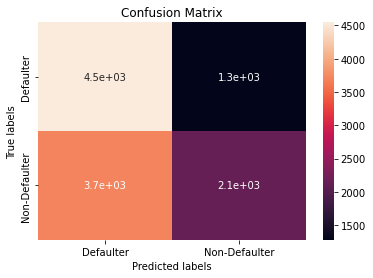

In [ ]:
#Confusion matrics for Test
labels = ['Defaulter', 'Non-Defaulter']
cm_xgb_cv= confusion_matrix(Y_test, y_pred_xgb_cv)
print(cm_xgb_cv)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

We can see that performance of XGboost model has been improved after cross validation with accuracy of 86%,precision 91%,recall 81%, F1 score 86% and ROC 86%. Only precision decrease a bit. By considering recall we can say that our model is performing better after cross validation.

####ML Model-**4 CatBoost**

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.2 MB/s eta 0:00:00


In [ ]:
#Implementing
from catboost import CatBoostClassifier
cb=cb_model=CatBoostClassifier(verbose=0)
cb.fit(X_train,Y_train)
y_pred_cb=cb.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
roc=roc_auc_score(Y_test, y_pred_cb)
acc = accuracy_score(Y_test,y_pred_cb)
prec = precision_score(Y_test,y_pred_cb)
rec = recall_score(Y_test,y_pred_cb)
f1 = f1_score(Y_test, y_pred_cb)

eval_matric_cb = pd.DataFrame([['CatBoost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
eval_matric=eval_matric.append(eval_matric_cb,ignore_index = True)
eval_matric

Model  Accuracy  Precision    Recall  F1 Score  \
0         Logistic Regression  0.623523   0.602242  0.733652  0.661484   
1   Tuned Logistic Regression  0.572505   0.626133  0.365716  0.461737   
2    Random Forest classifier  0.873224   0.898833  0.841899  0.869435   
3         Tuned Random Forest  0.828882   0.871676  0.772409  0.819046   
4  Tuned K-Nearest  Neighbors  0.822719   0.767071  0.928291  0.840015   
5                     XGboost  0.856360   0.915821  0.785726  0.845800   
6               Tuned XGboost  0.867317   0.917426  0.808093  0.859296   
7                    CatBoost  0.865177   0.916213  0.804678  0.856831   

        ROC  
0  0.623221  
1  0.573073  
2  0.873310  
3  0.829037  
4  0.822429  
5  0.856554  
6  0.867480  
7  0.865343

Catboost model having accuracy of 86%,precision 91%, recall 80%, F1 score 85% and ROC 86%.We will check improvmnet of model after hyperparameter tuning.

####Cross Validation

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params_cb={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
cb_cv=RandomizedSearchCV(estimator=cb_model,param_distributions=params_cb,cv=3,scoring='recall',verbose=0,n_jobs=-1)
#Fit the Algorithm
cb_cv.fit(X_train,Y_train)
#Prediction
y_pred_cb_cv=cb_cv.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
roc=roc_auc_score(Y_test, y_pred_cb_cv)
acc = accuracy_score(Y_test,y_pred_cb_cv)
prec = precision_score(Y_test,y_pred_cb_cv)
rec = recall_score(Y_test,y_pred_cb_cv)
f1 = f1_score(Y_test, y_pred_cb_cv)

eval_matric_cb_cv = pd.DataFrame([['Tuned CatBoost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
eval_matric=eval_matric.append(eval_matric_cb_cv,ignore_index = True)
eval_matric

Model  Accuracy  Precision    Recall  F1 Score  \
0         Logistic Regression  0.623523   0.602242  0.733652  0.661484   
1   Tuned Logistic Regression  0.572505   0.626133  0.365716  0.461737   
2    Random Forest classifier  0.873224   0.898833  0.841899  0.869435   
3         Tuned Random Forest  0.828882   0.871676  0.772409  0.819046   
4  Tuned K-Nearest  Neighbors  0.822719   0.767071  0.928291  0.840015   
5                     XGboost  0.856360   0.915821  0.785726  0.845800   
6               Tuned XGboost  0.867317   0.917426  0.808093  0.859296   
7                    CatBoost  0.865177   0.916213  0.804678  0.856831   
8              Tuned CatBoost  0.863380   0.905269  0.812532  0.856397   

        ROC  
0  0.623221  
1  0.573073  
2  0.873310  
3  0.829037  
4  0.822429  
5  0.856554  
6  0.867480  
7  0.865343  
8  0.863519

After cross validation recall of CatBoost model increased slightly rest all decreases.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I will be considering Recall mostly for evaluation of models because False Negative indicate that a person will not default when they actually default. And detecting defaulter customers as non defaulter will lead to huge loss to bank so we have to minimise False Negative and as false negative decrease Recall will increase.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I will choose K-Nearest Neghbors as my final prediction model because Recall for KNN model before cross validation was aprrox 85% and after Cross validation recall  became approx 92%, which highigher than other models in both case.

###3. Explain the model which you have used and the feature importance using any model explainability tool?

I have selected K-Nearest Neighbors as my base model,and  as we can not find coefficient of model due to non-paramatic nature of model and also we can not find feature importance for this model because KNN makes predictions based on the similarity of an input sample to the labeled training samples, thats why i am not using any model explainability tool.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


*   **We have seen that our dataset was imbalanced class.**
*  **Most of the credit card holder was Female and Male customers have high default ratio.**

*   **Higher educated persons have less rate to be default whereas lower educated will maximum chances to be default.**
*  **After age 60s years chance of default is high**.


*  **The important metric to compare all the algorithms in this case is ‘Recall’. As the company can’t afford to predict False negative i.e. predict defaulter as a non defaulter. Since, company is one, who will give to money to the customers,if, for any reason giving money to defaulter is gaining more risk to getting the investment back. Hence, here identifying false negative is important.**

*   **K-Nearest Neighbors model with hyperparameter tunning perform well in terms of recall(92%).**








### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***